In [35]:
from database.strategy import Strategy
from database.sec import SEC
from database.market import Market
from transformer.date_transformer import DateTransformer
from transformer.column_transformer import ColumnTransformer
from transformer.model_transformer import ModelTransformer
from transformer.product_transformer import ProductTransformer
from transformer.predictor_transformer import PredictorTransformer
from preprocessor.model_preprocessor import ModelPreprocessor
from preprocessor.predictor_preprocessor import PredictorPreprocessor
from modeler.modeler import Modeler as sp
from utils.date_utils import DateUtils
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone
from tqdm import tqdm
import math
from IPython.core.debugger import set_trace
import re

In [28]:
## Loading Constants
start = "2008-01-01"
end = datetime(2021,1,1).strftime("%Y-%m-%d")
# Loading Databases
strat_db = Strategy("unity")
market = Market()
sec = SEC("sec")
market.connect()
tickers = market.retrieve_data("sp500").sort_values("Symbol")
market.close()
model_range = range(len(tickers["Symbol"]))

In [29]:
market.connect()
accurate = market.retrieve_data("accurate")
relevant_tickers = list(accurate["ticker"])
relevant_tickers.extend(["date","year","quarter"])
market.close()

In [30]:
sims = []
yearly_gap = 1
training_years = 7
sec.connect()
### switch to all tickers
for ticker in list(accurate["ticker"])[0:1]:
    cik = int(tickers[tickers["Symbol"]==ticker]["CIK"].item())
    filing = sec.retrieve_filing_data(cik)
    funds = filing.copy()
    ## date transformations and gap management
    funds["filed"] = [datetime.strptime(str(x),"%Y%m%d").replace(tzinfo=timezone.utc) if "-" not in str(x) else \
                        datetime.strptime(str(x).split(" ")[0],"%Y-%m-%d").replace(tzinfo=timezone.utc) for x in funds["filed"]]

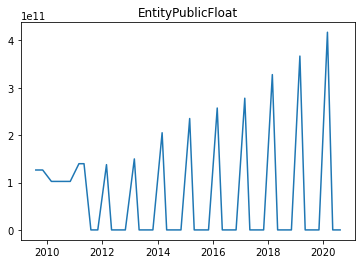

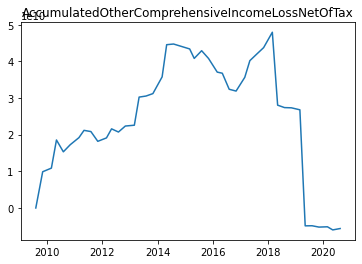

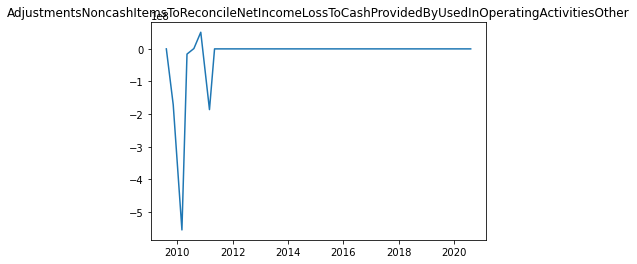

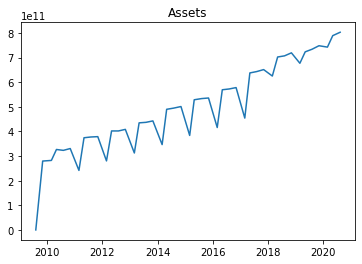

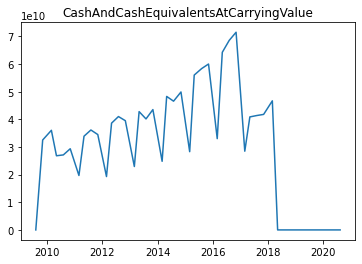

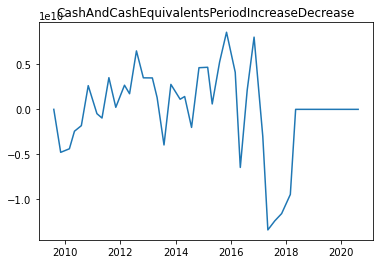

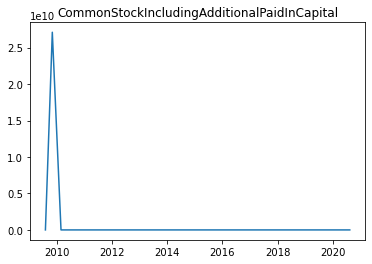

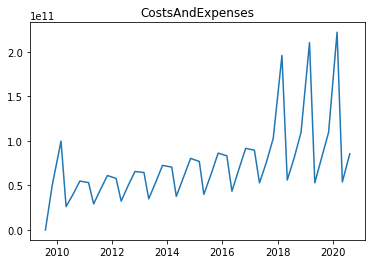

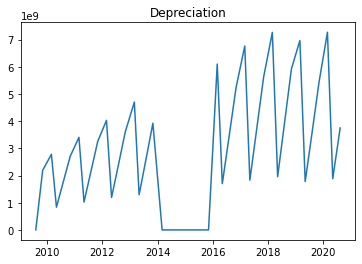

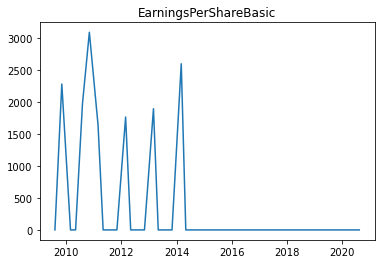

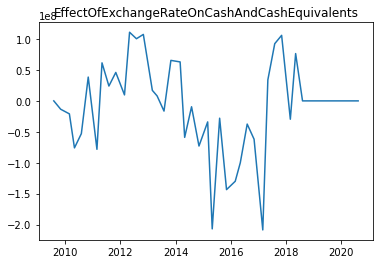

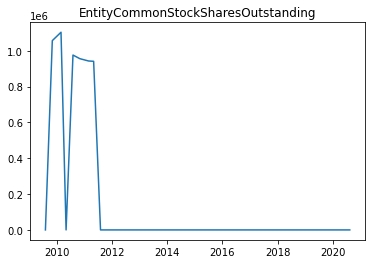

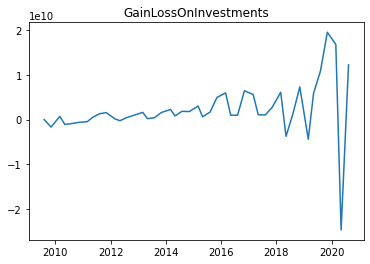

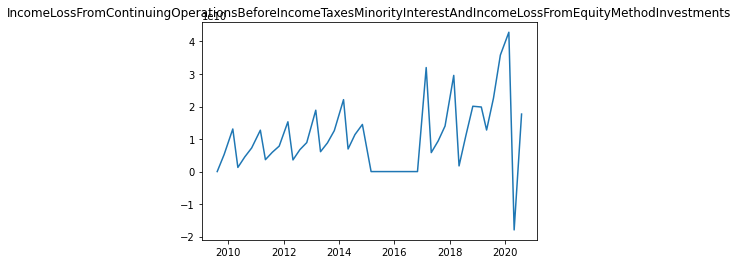

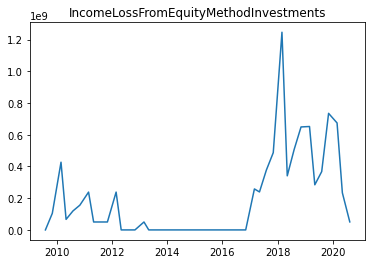

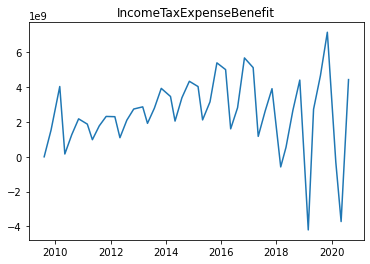

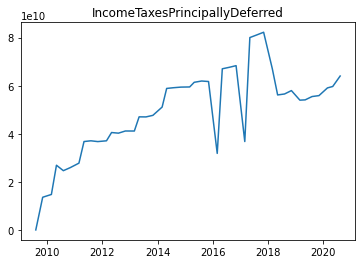

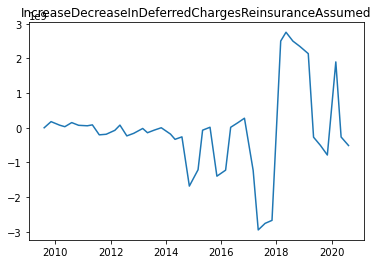

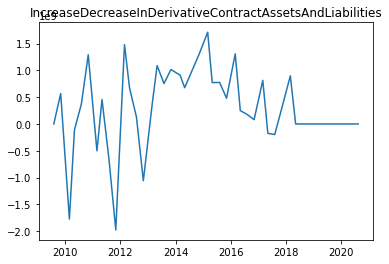

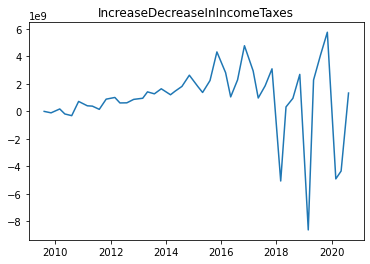

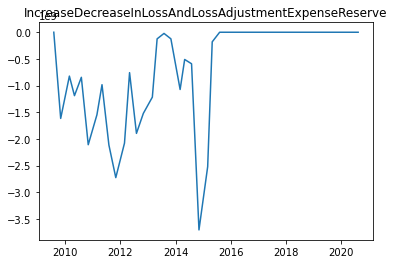

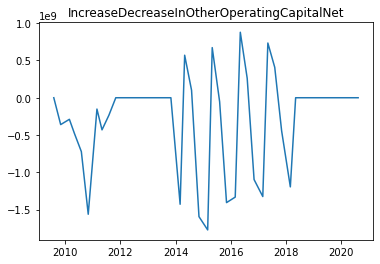

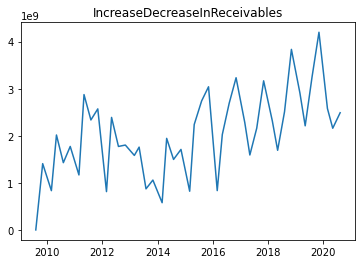

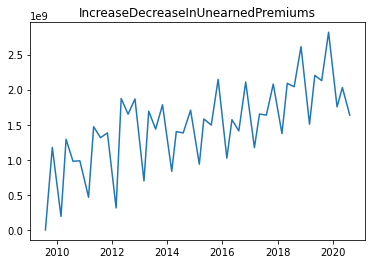

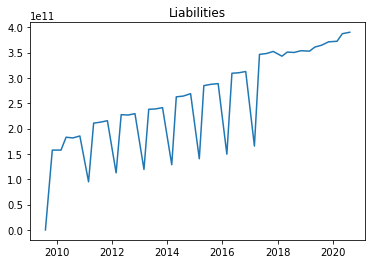

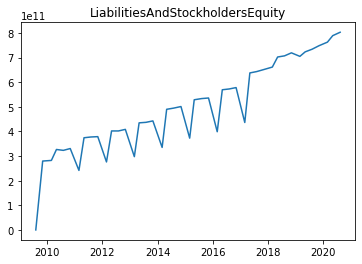

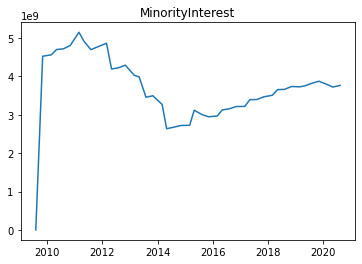

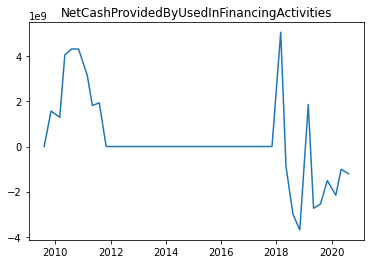

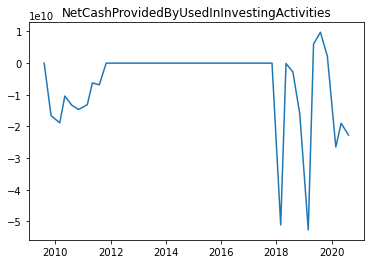

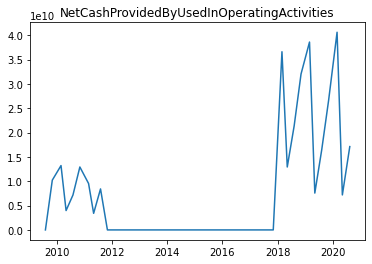

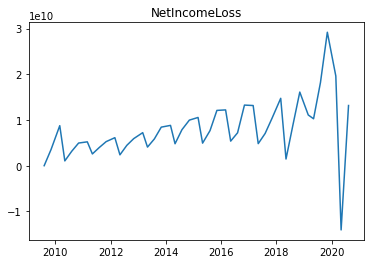

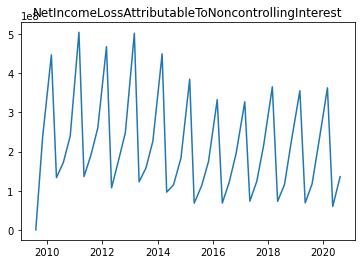

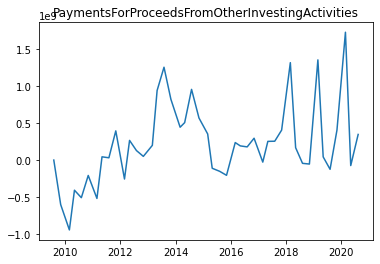

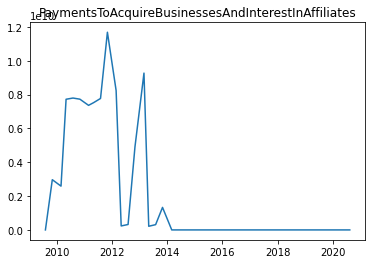

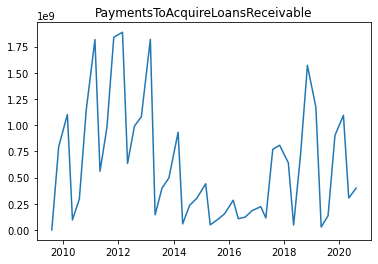

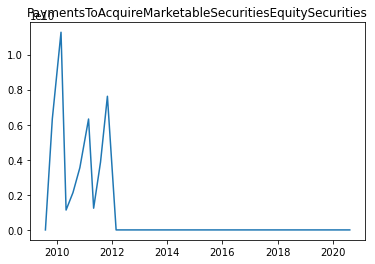

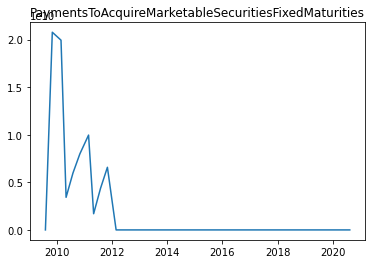

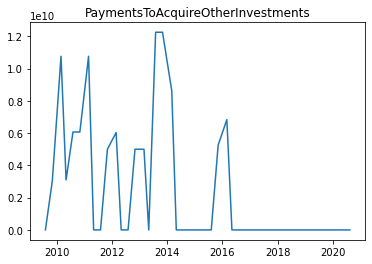

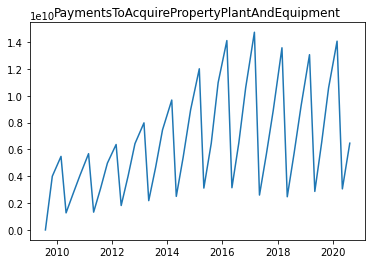

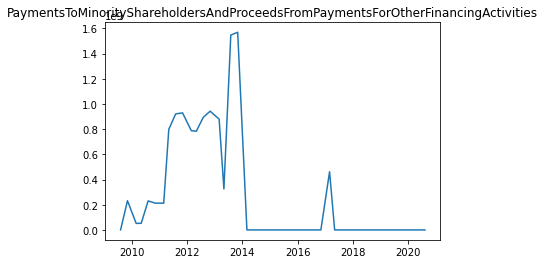

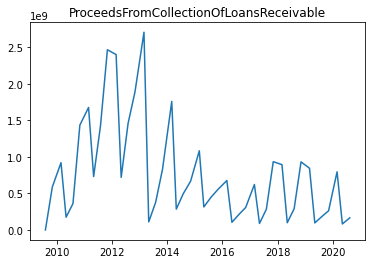

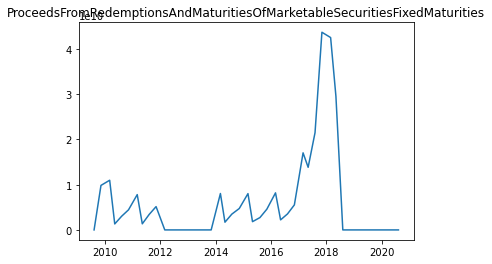

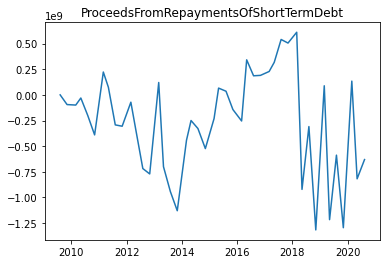

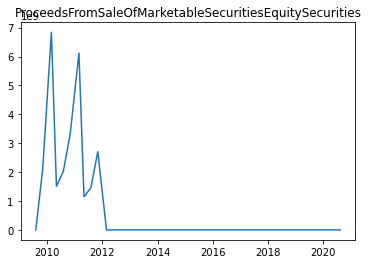

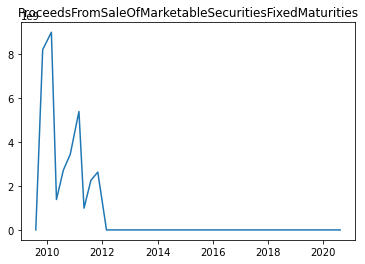

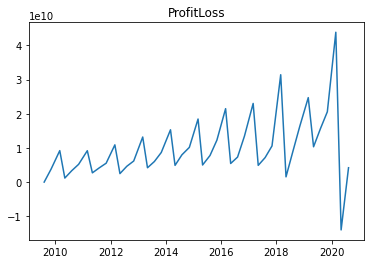

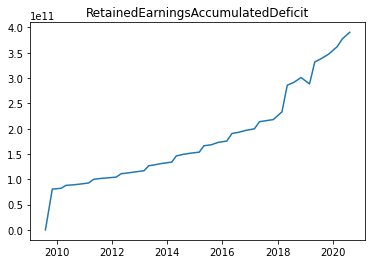

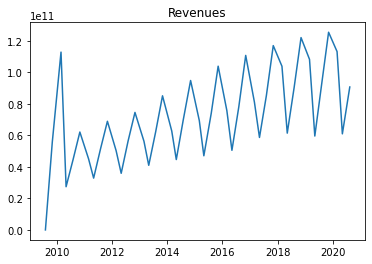

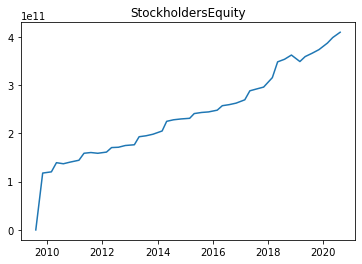

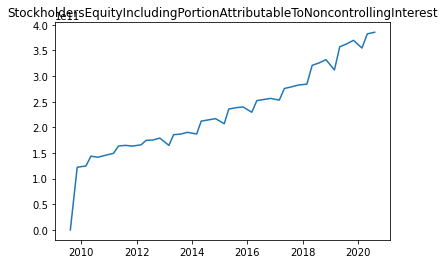

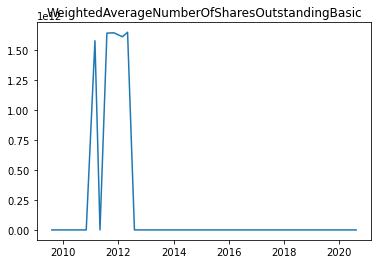

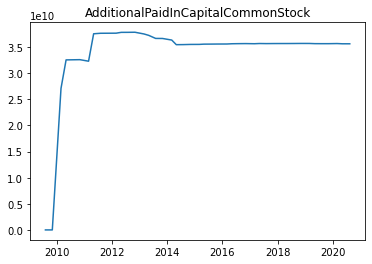

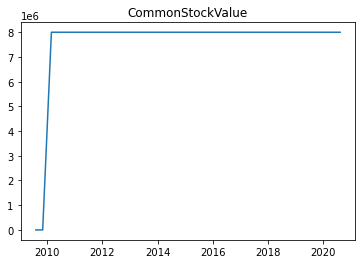

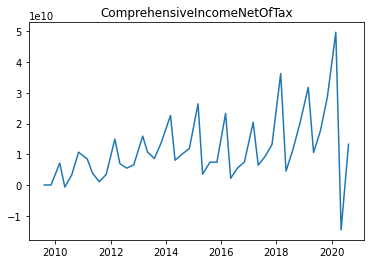

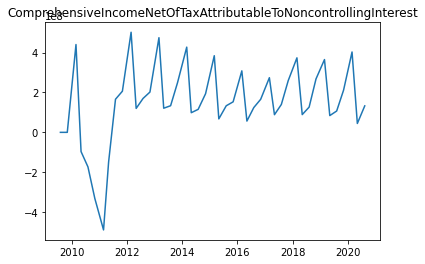

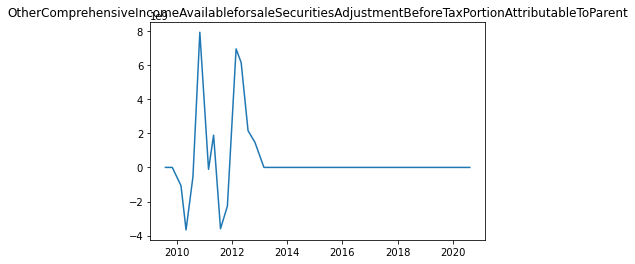

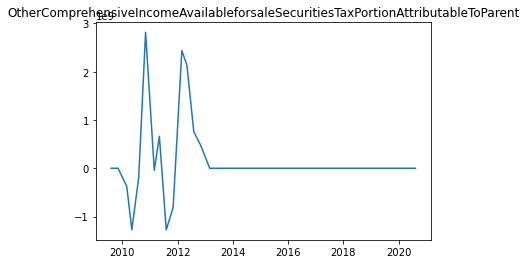

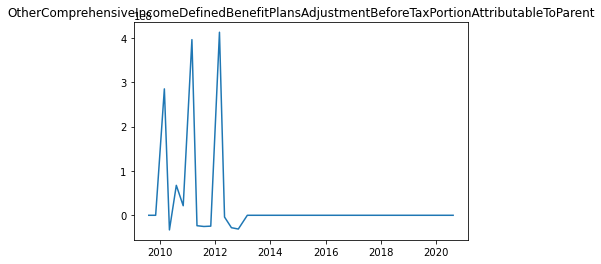

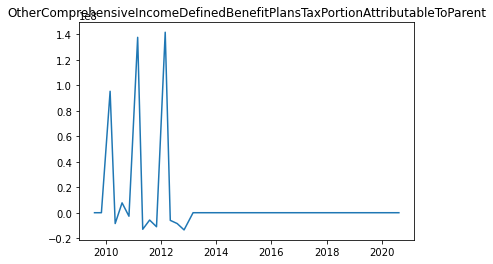

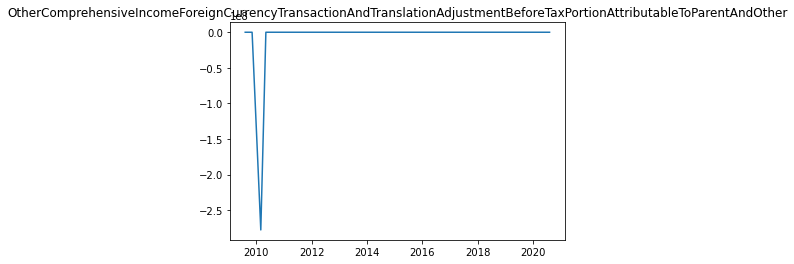

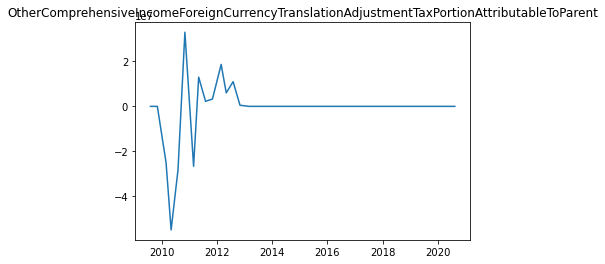

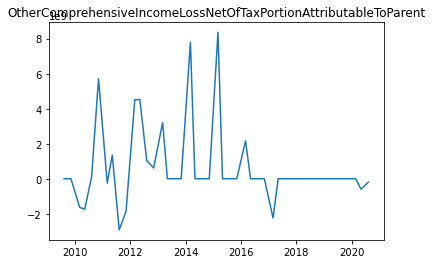

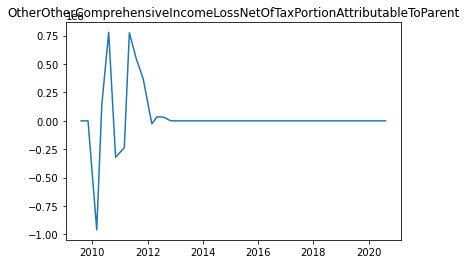

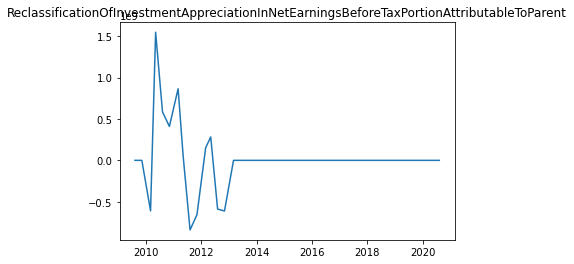

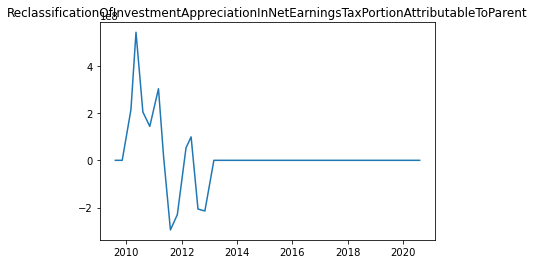

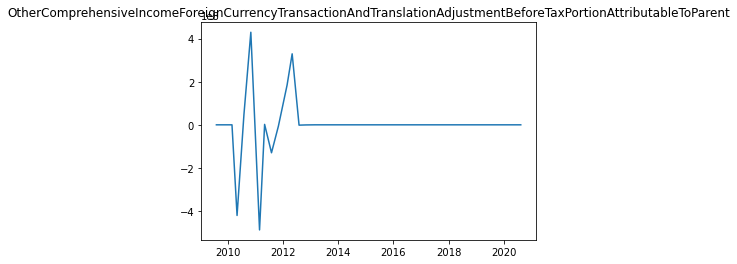

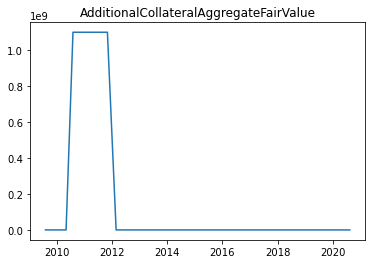

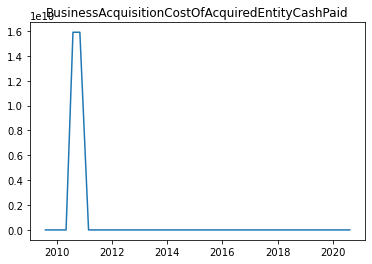

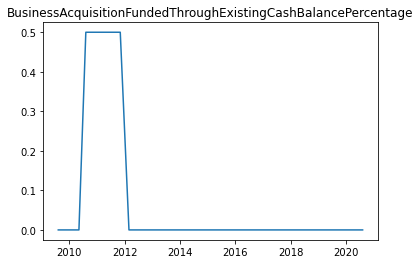

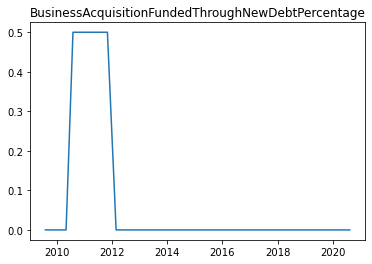

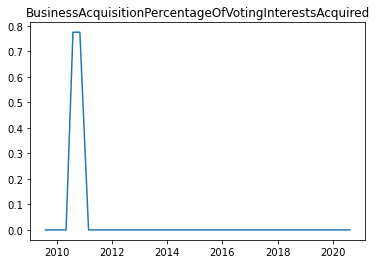

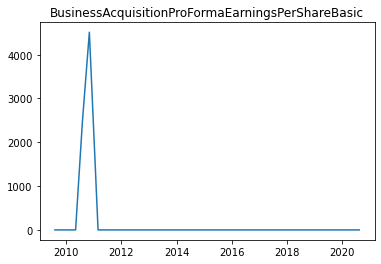

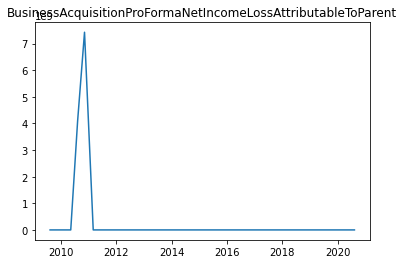

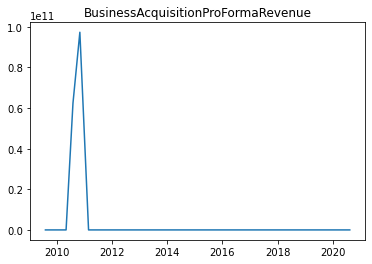

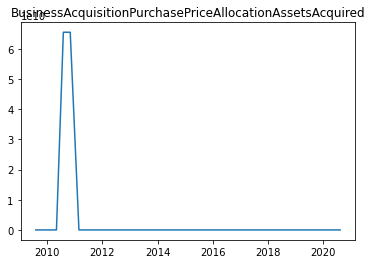

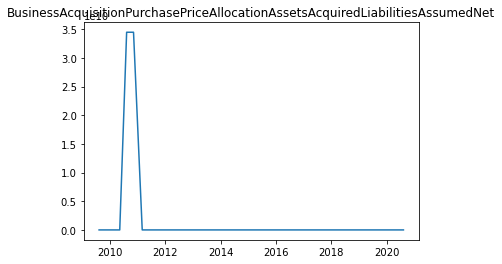

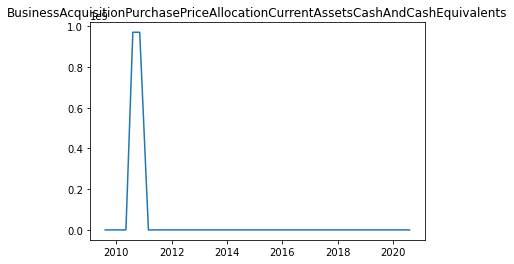

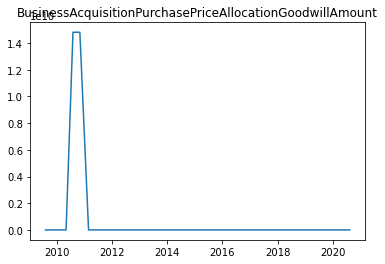

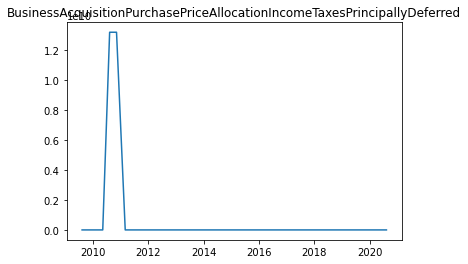

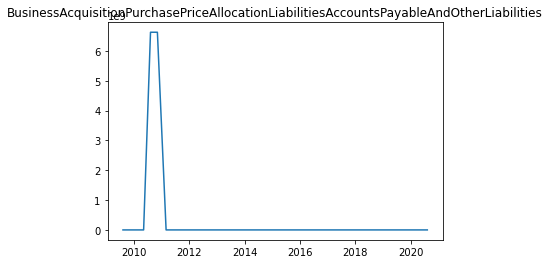

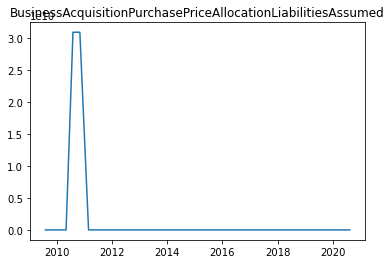

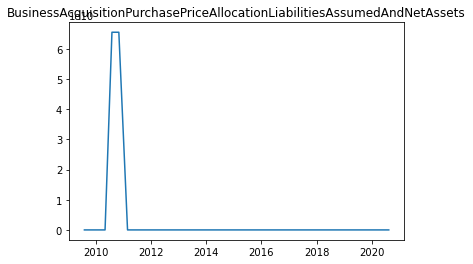

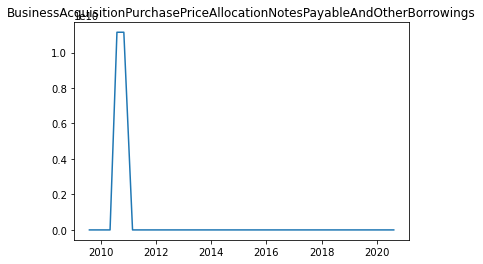

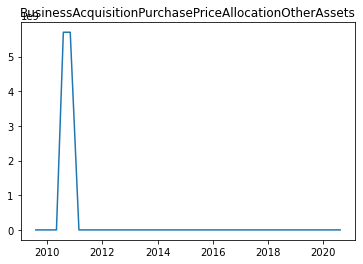

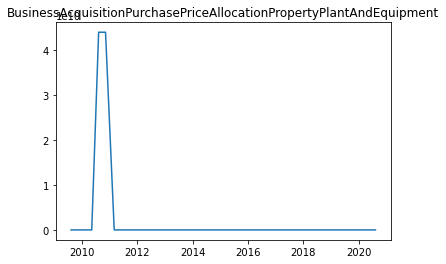

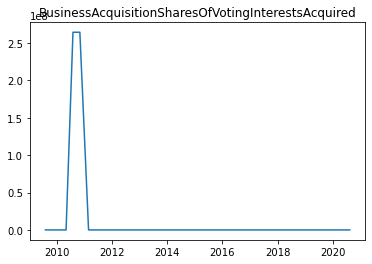

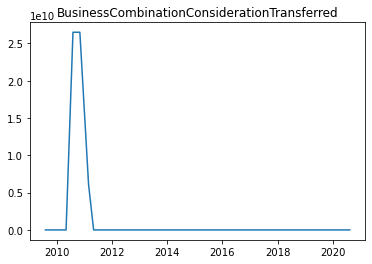

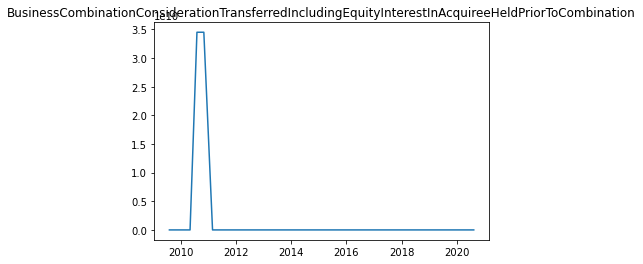

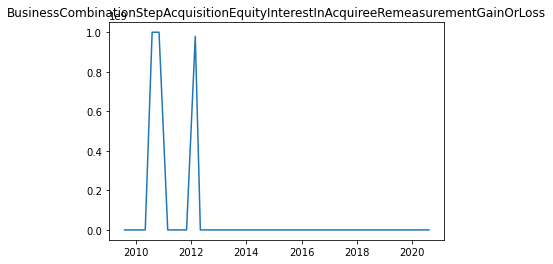

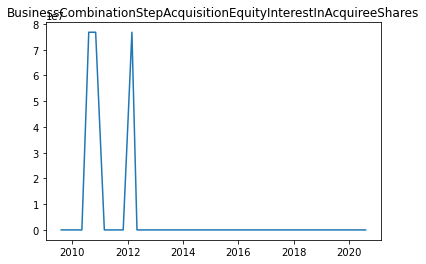

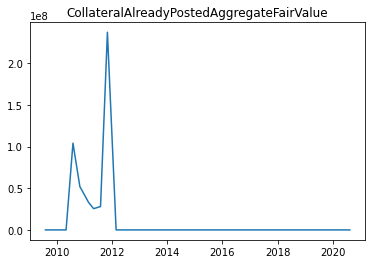

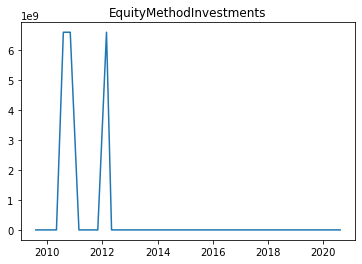

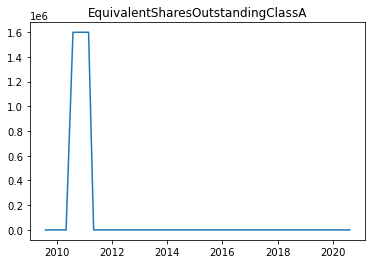

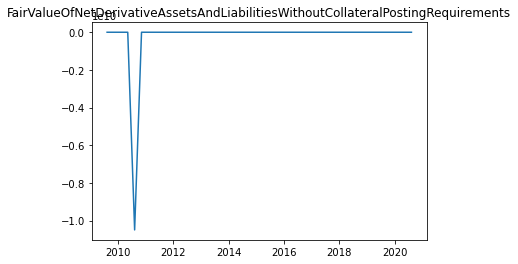

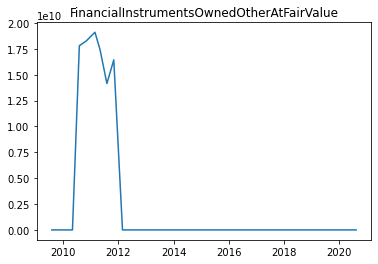

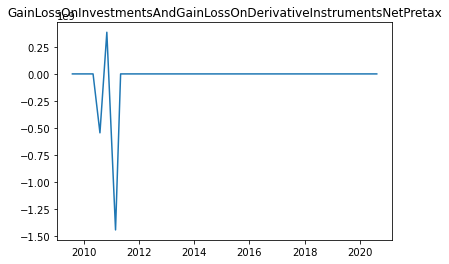

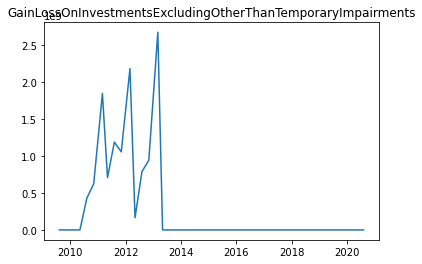

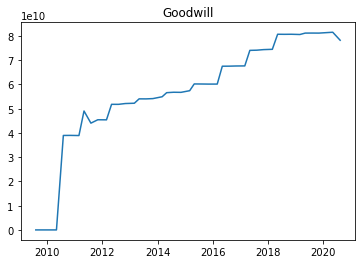

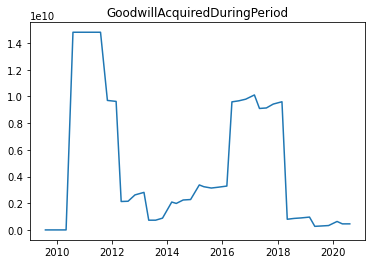

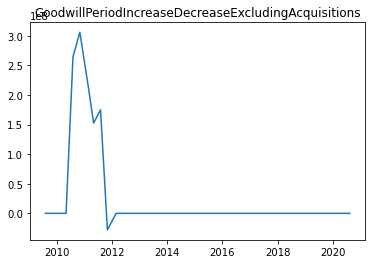

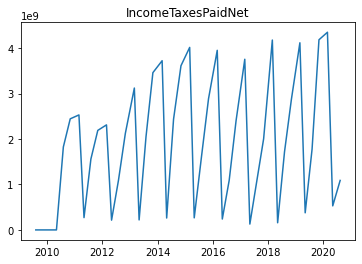

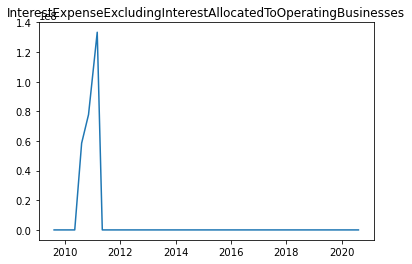

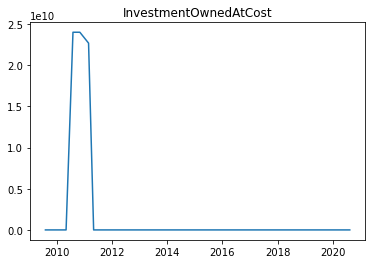

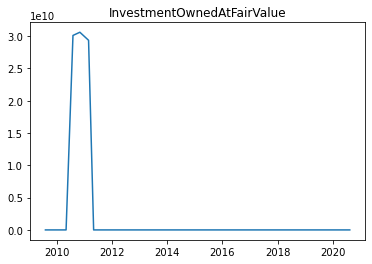

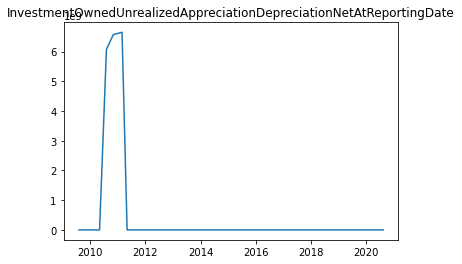

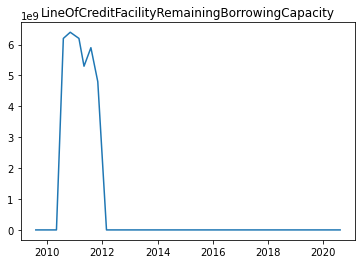

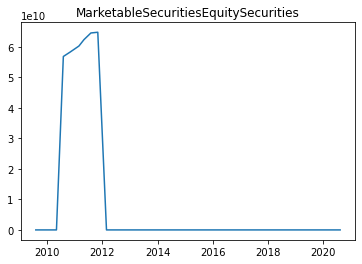

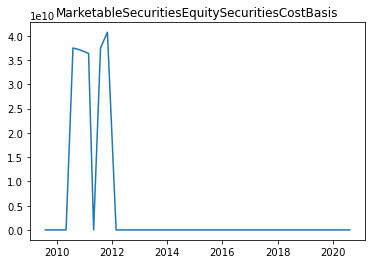

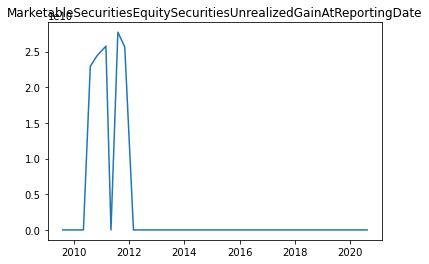

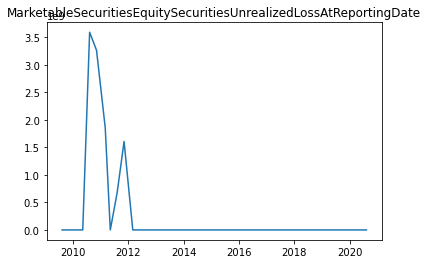

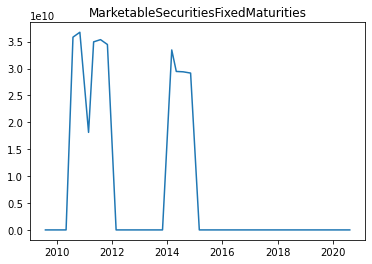

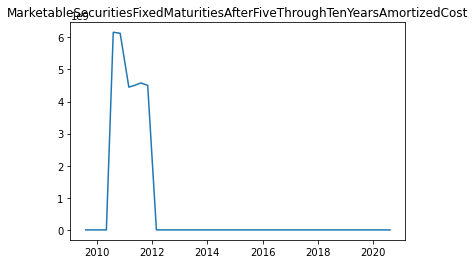

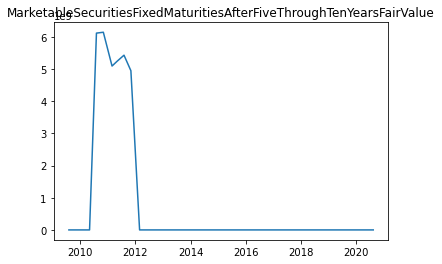

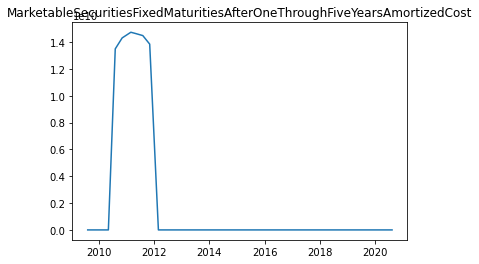

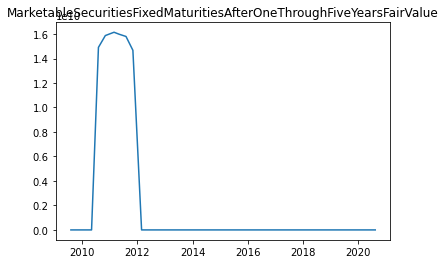

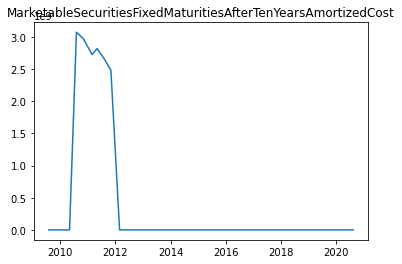

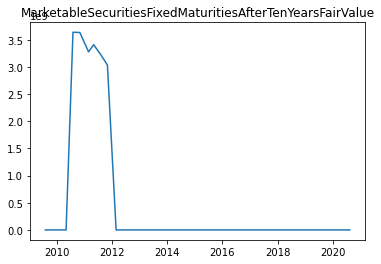

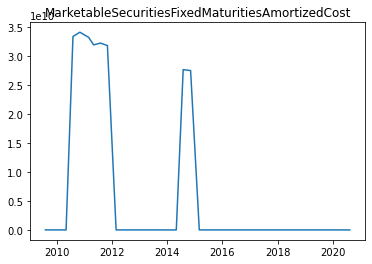

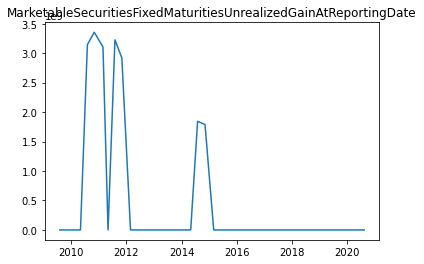

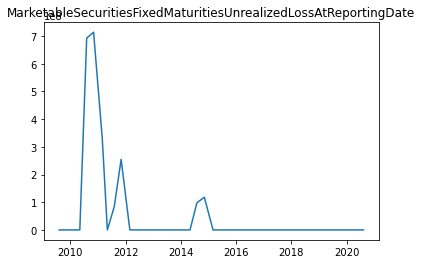

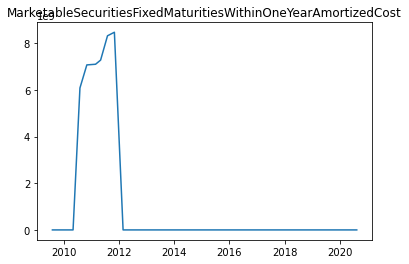

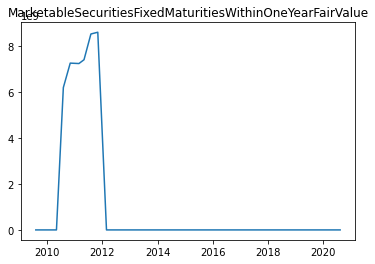

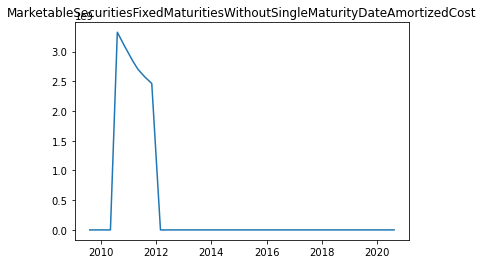

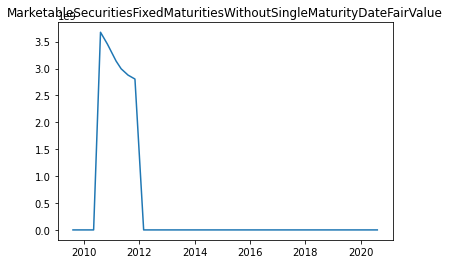

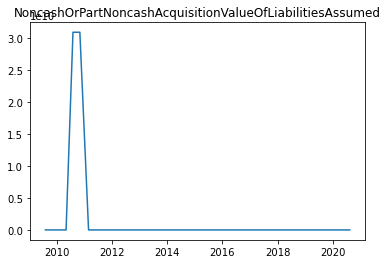

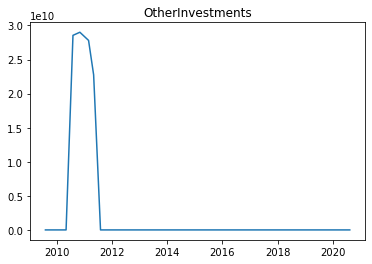

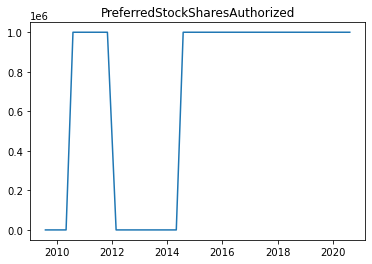

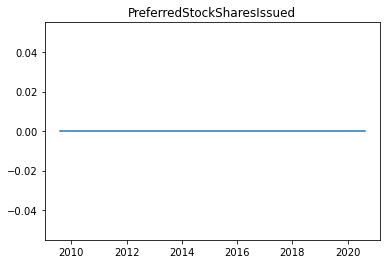

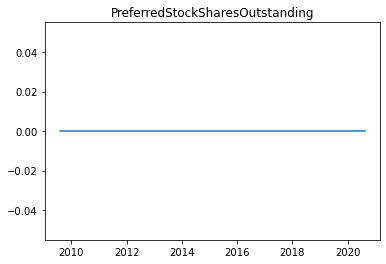

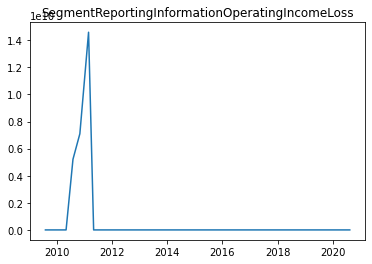

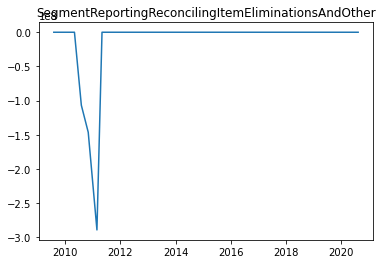

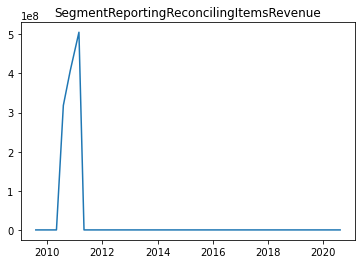

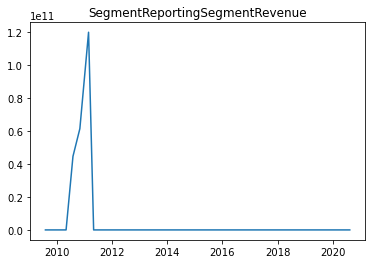

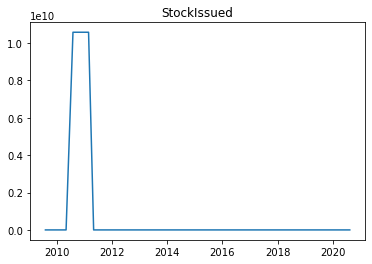

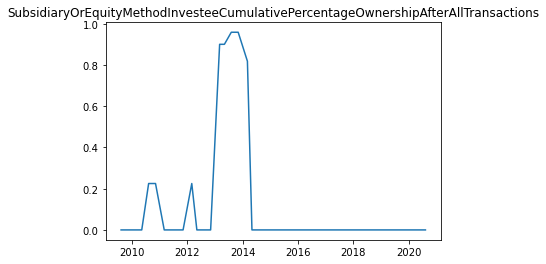

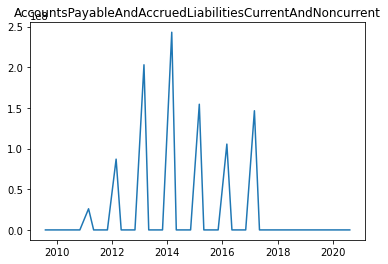

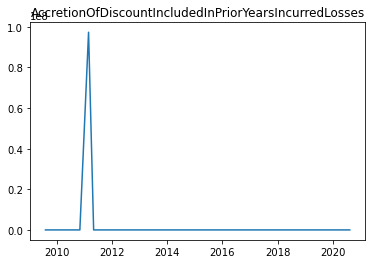

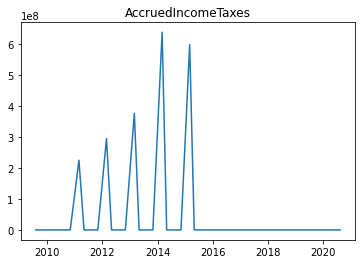

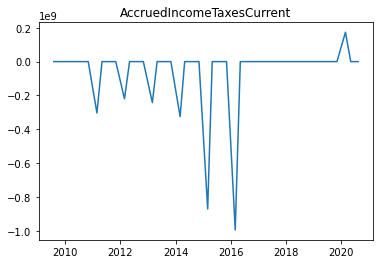

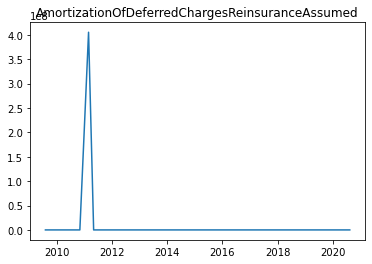

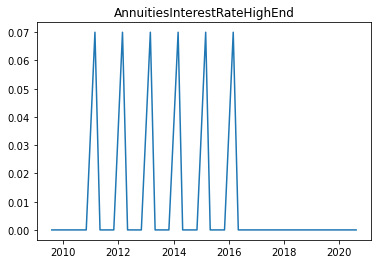

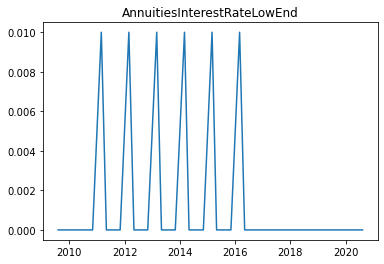

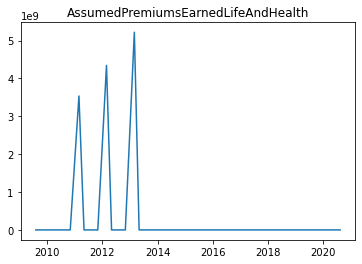

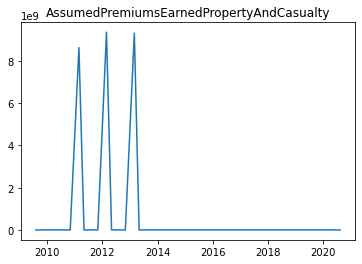

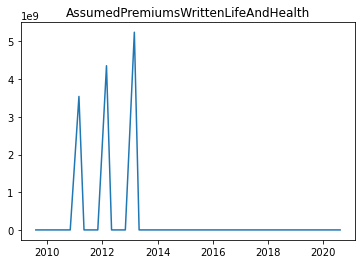

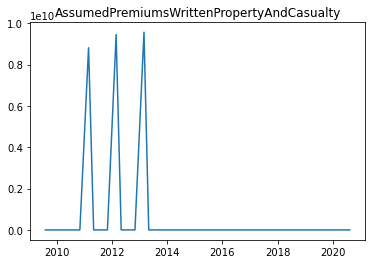

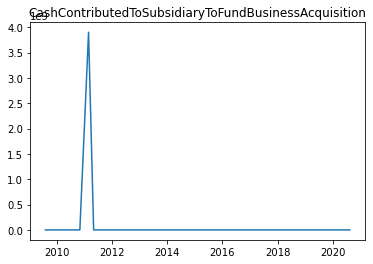

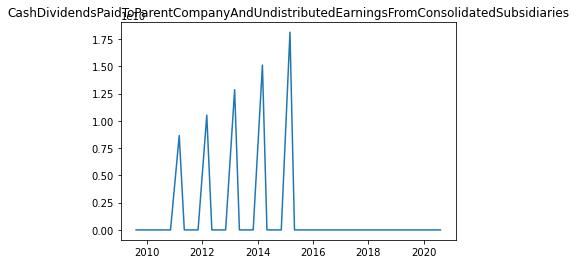

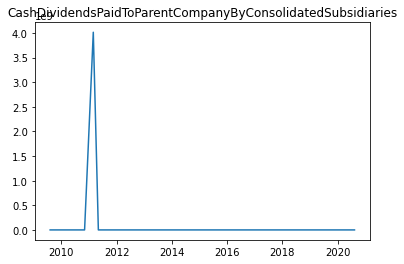

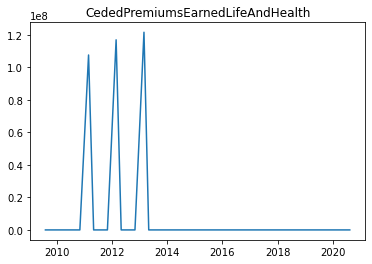

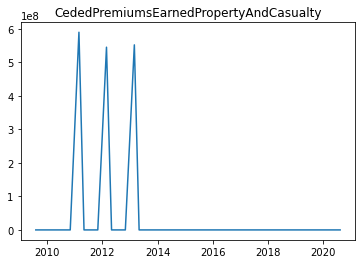

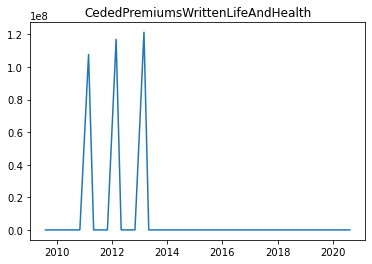

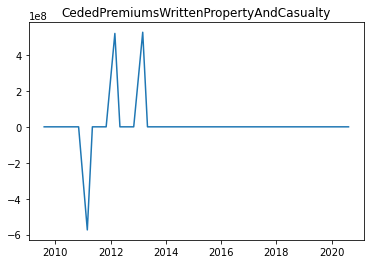

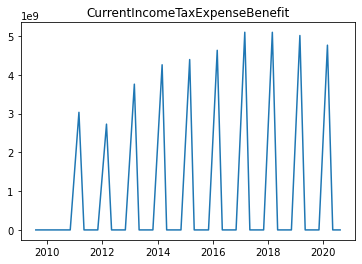

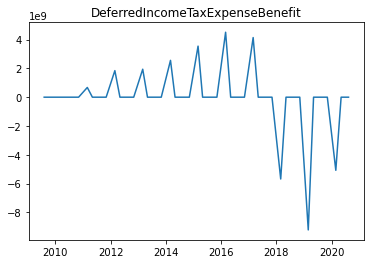

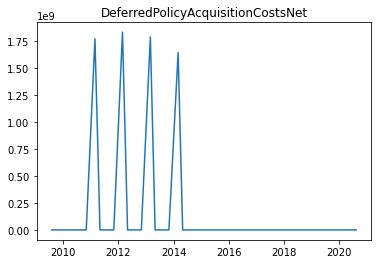

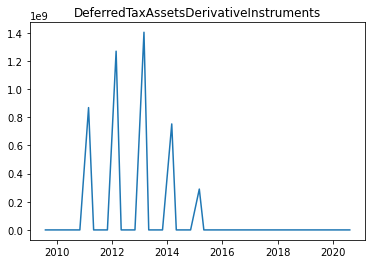

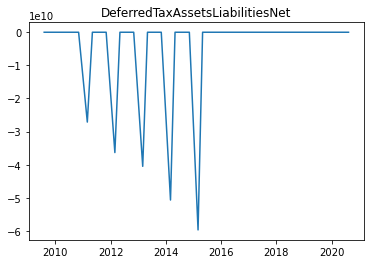

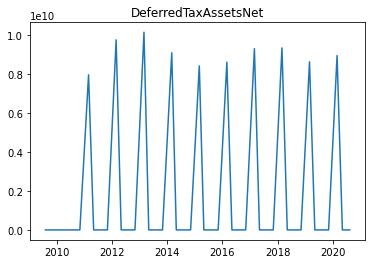

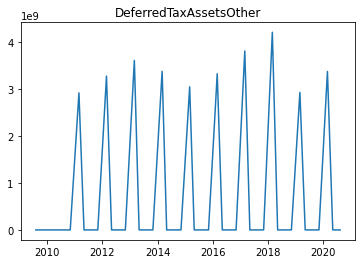

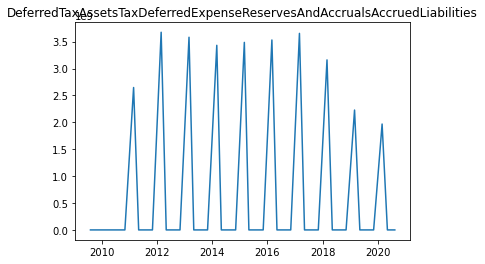

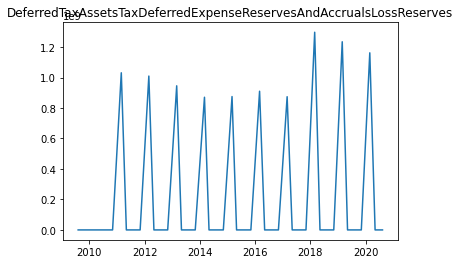

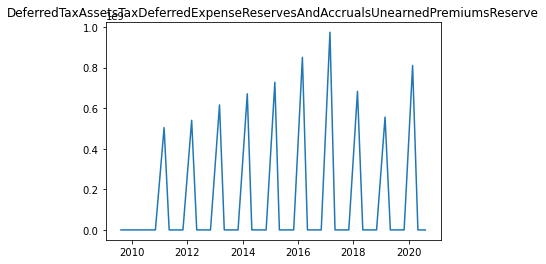

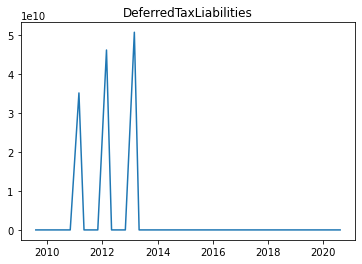

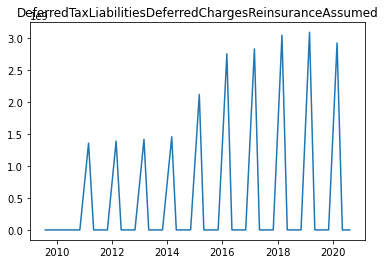

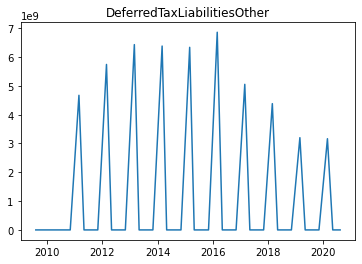

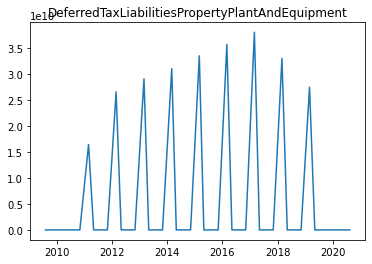

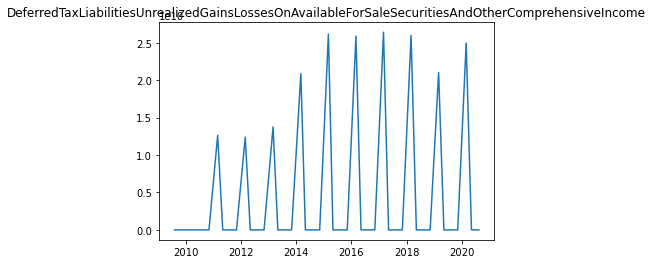

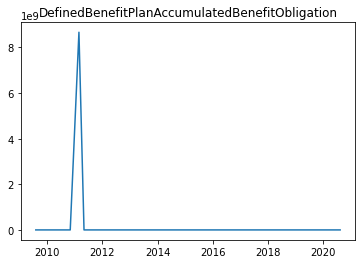

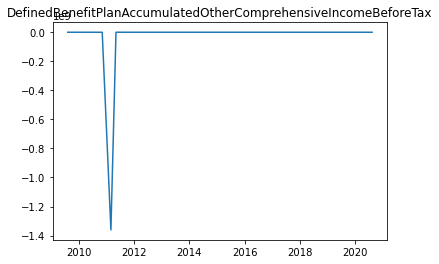

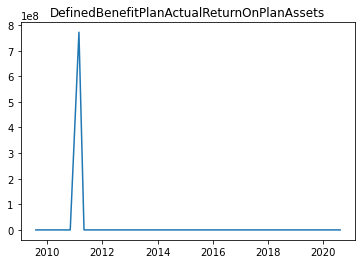

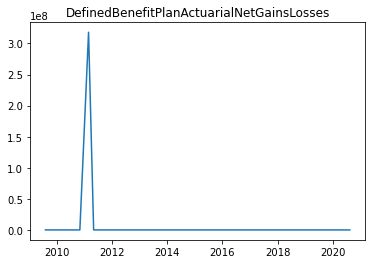

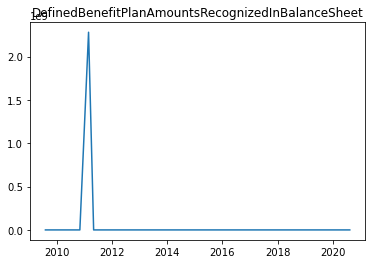

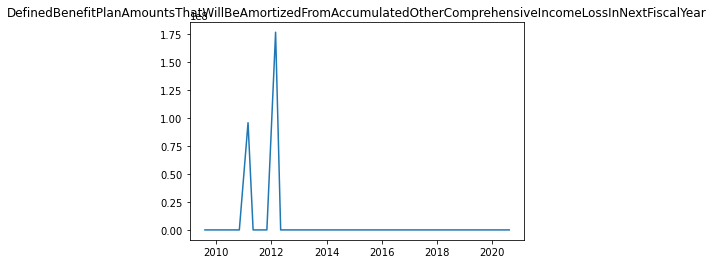

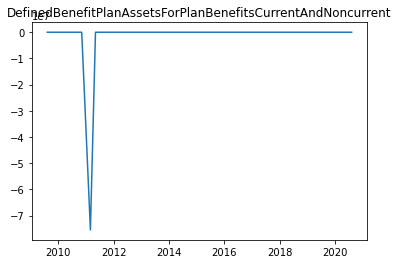

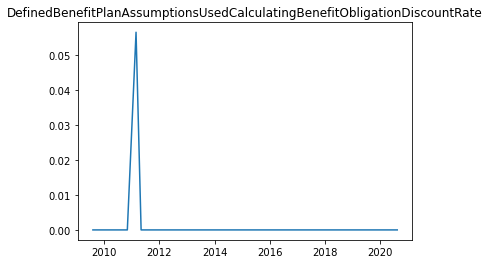

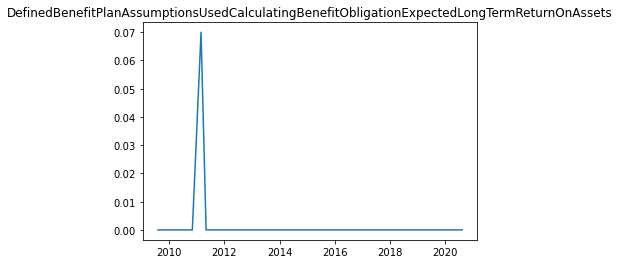

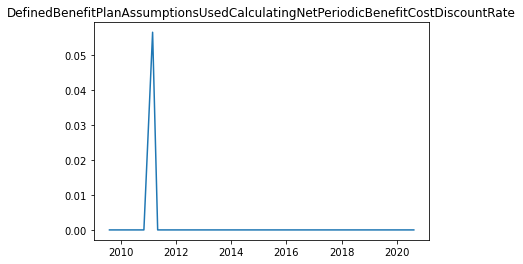

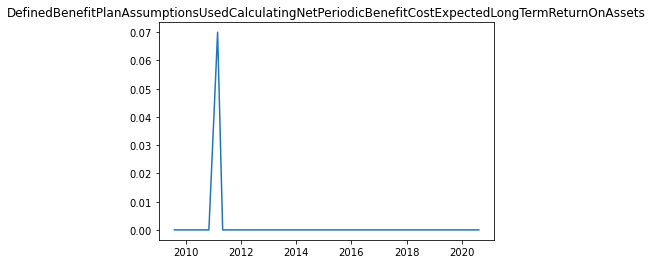

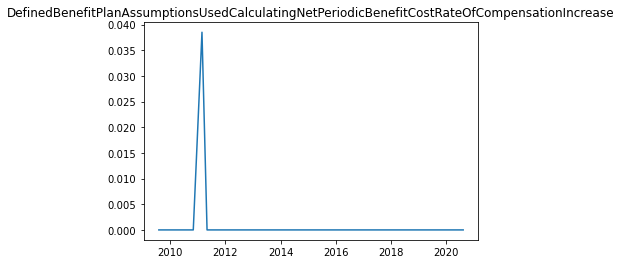

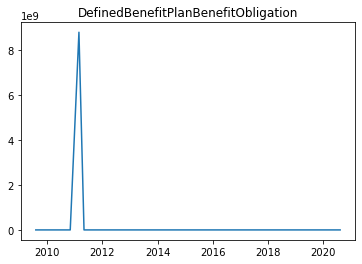

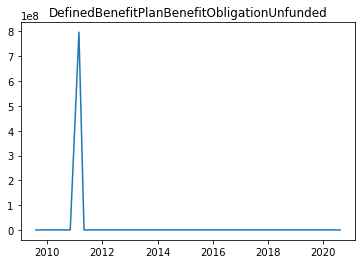

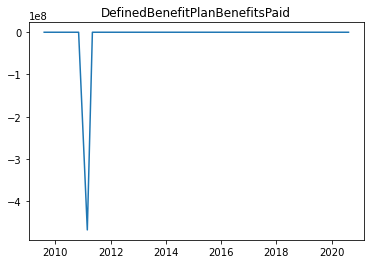

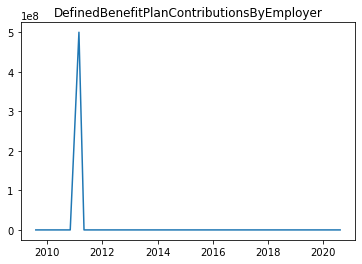

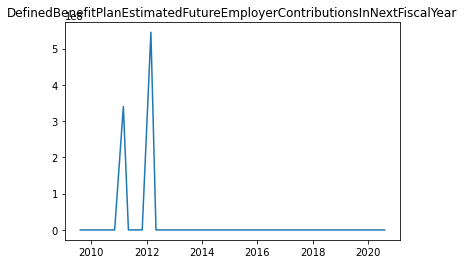

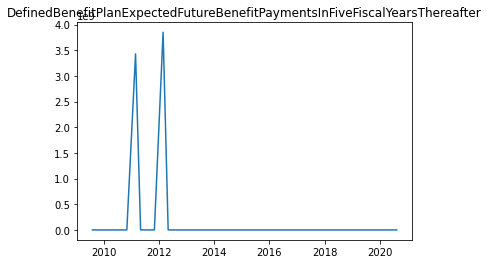

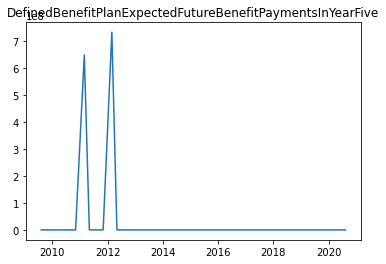

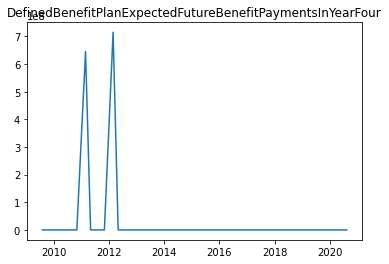

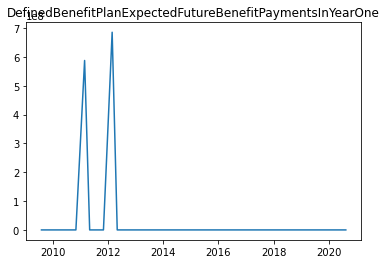

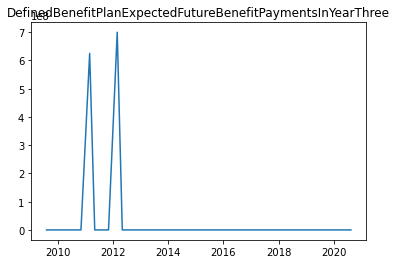

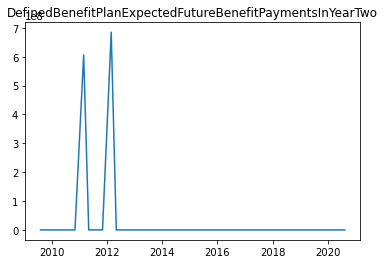

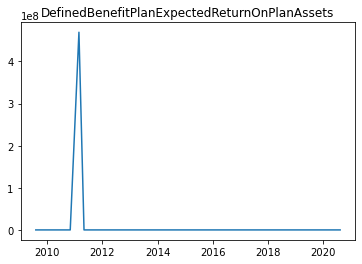

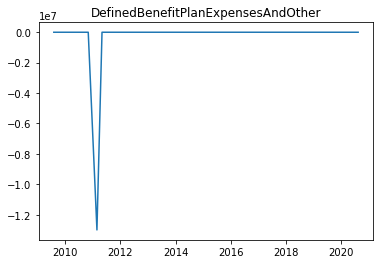

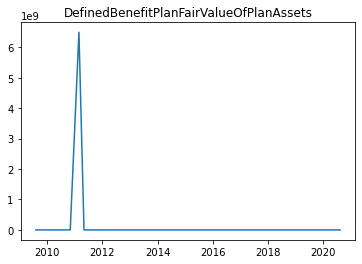

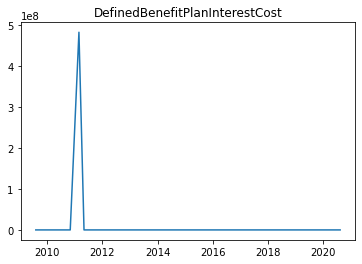

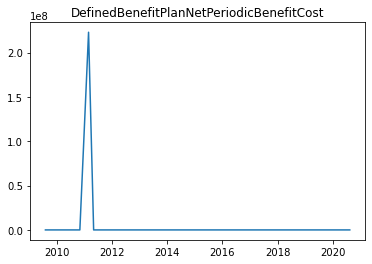

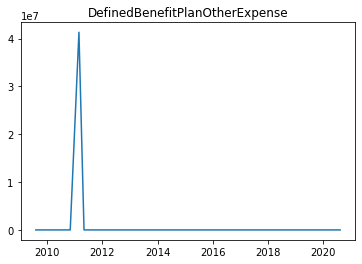

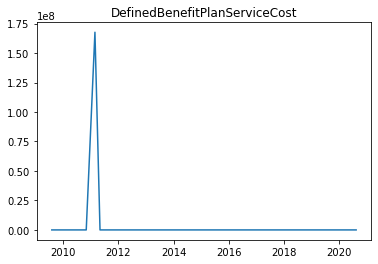

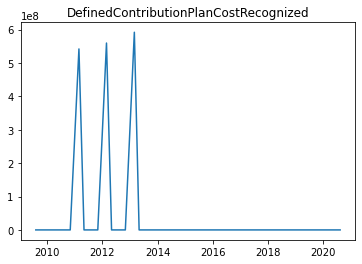

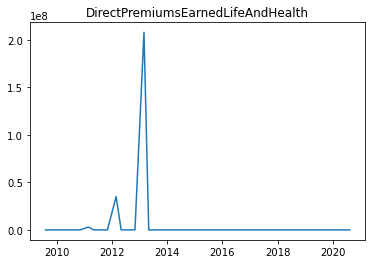

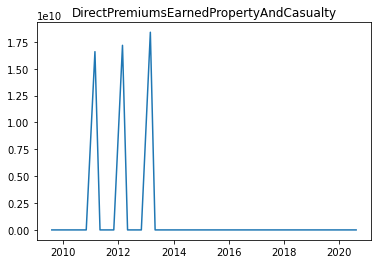

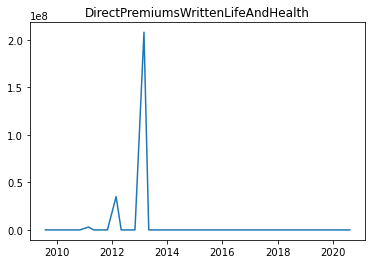

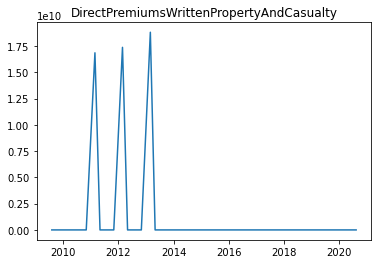

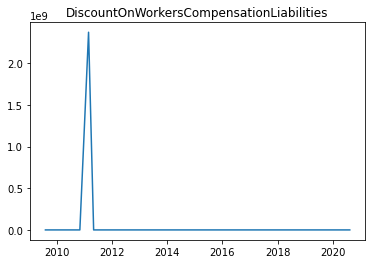

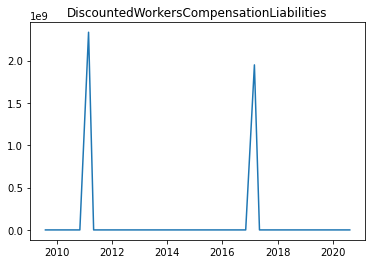

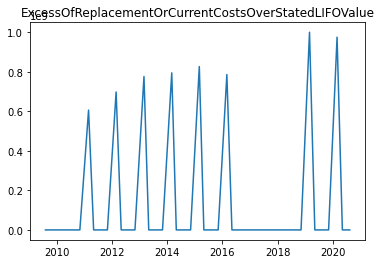

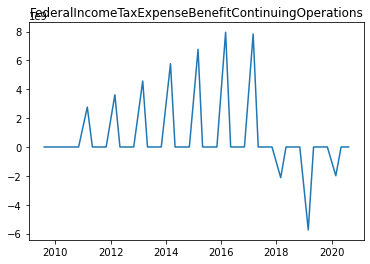

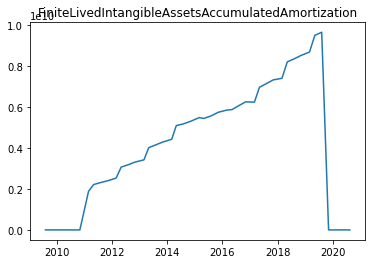

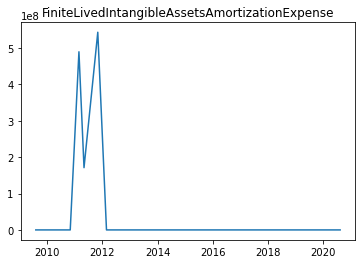

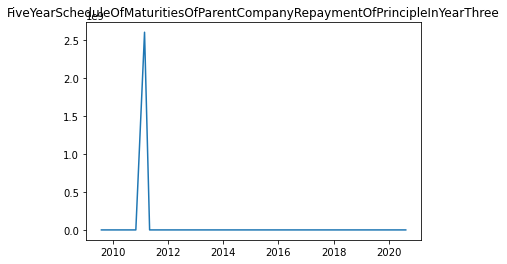

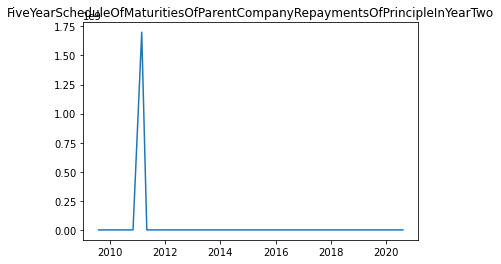

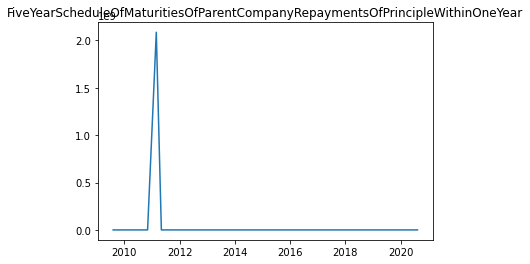

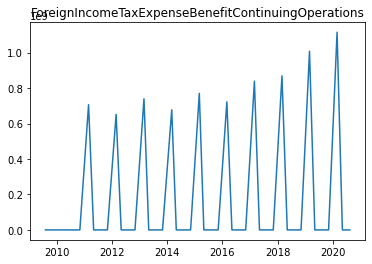

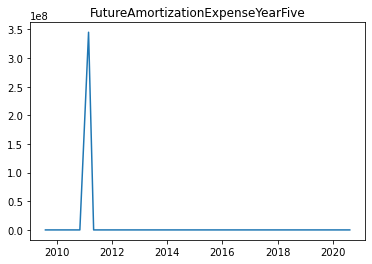

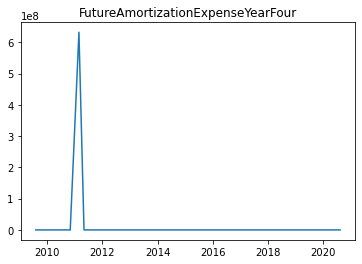

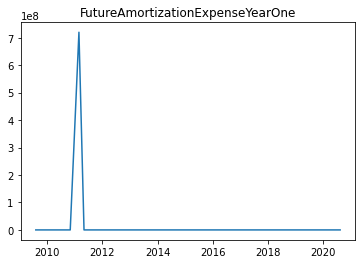

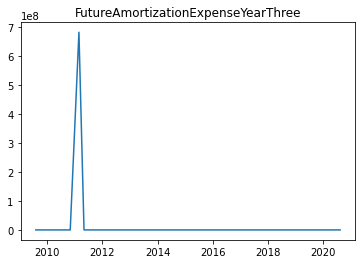

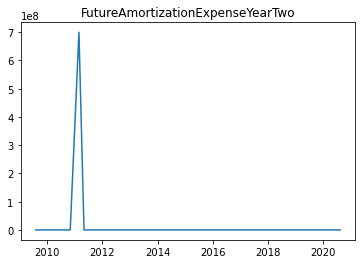

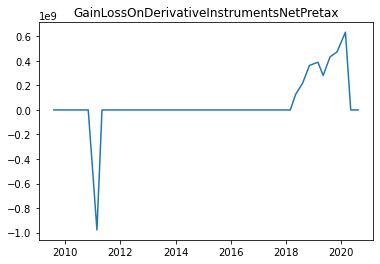

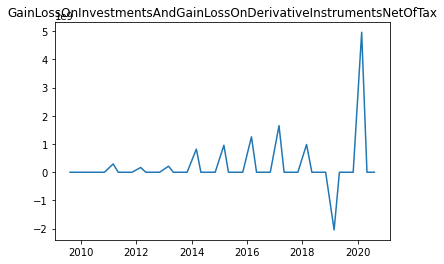

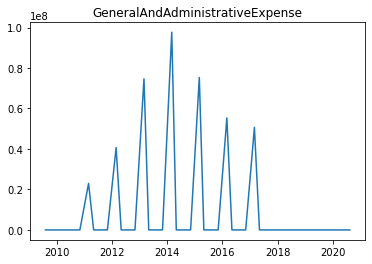

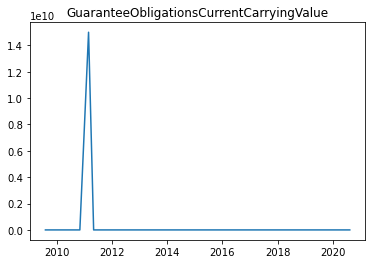

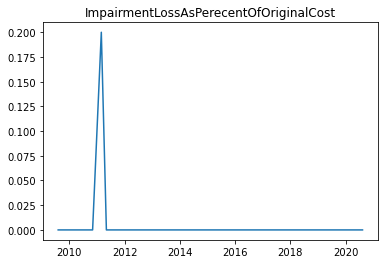

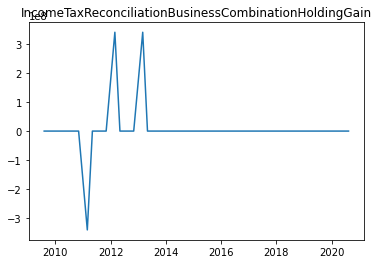

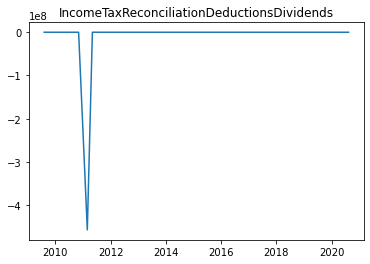

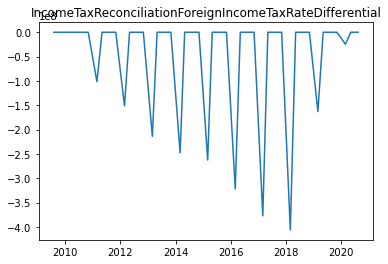

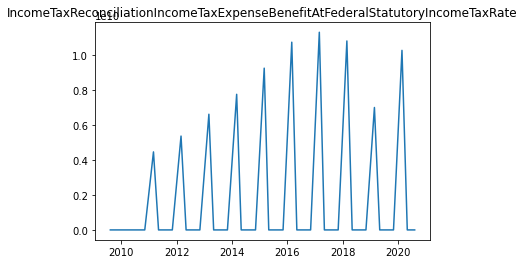

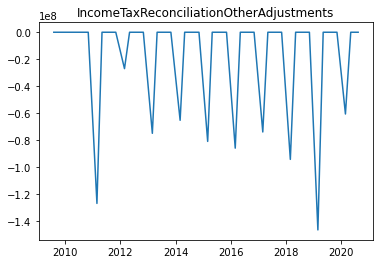

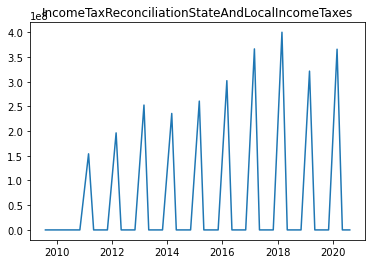

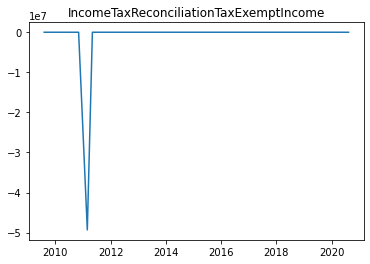

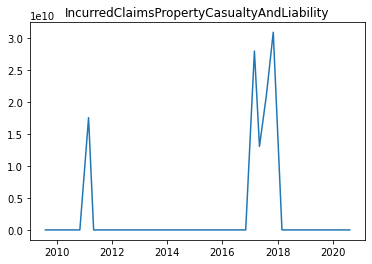

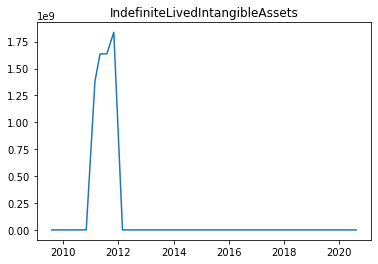

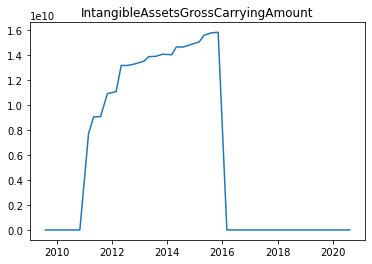

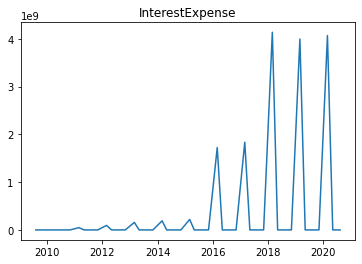

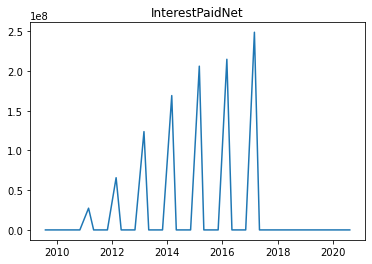

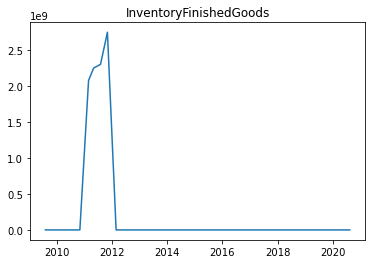

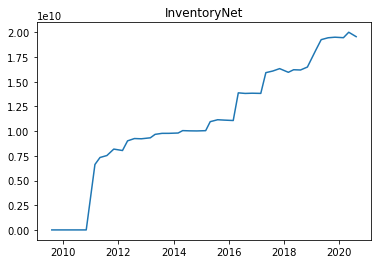

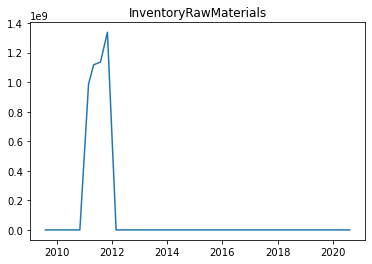

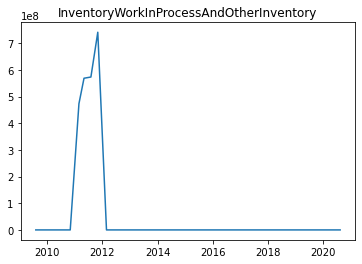

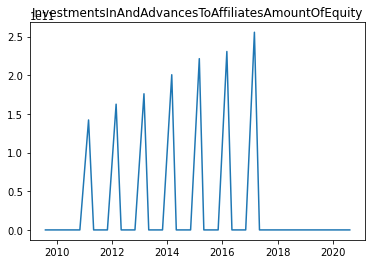

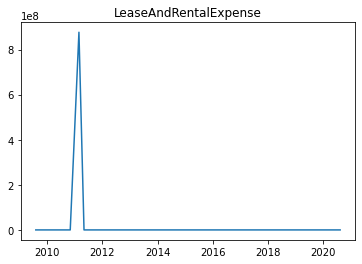

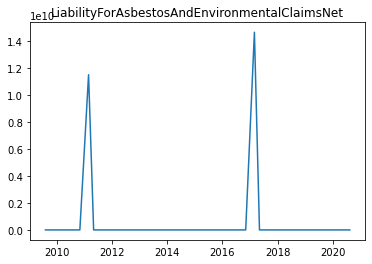

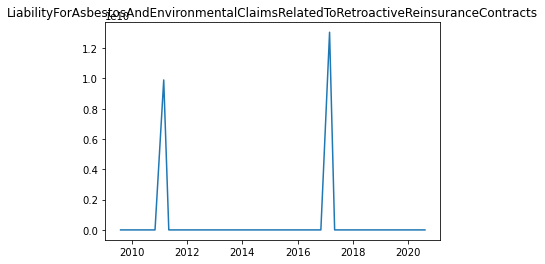

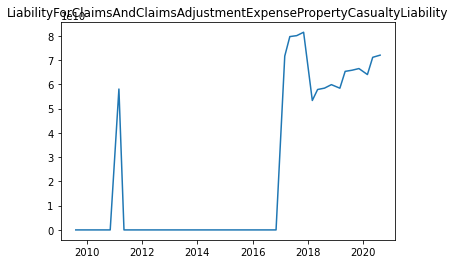

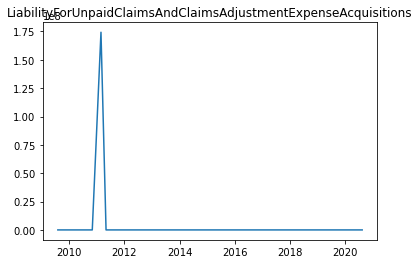

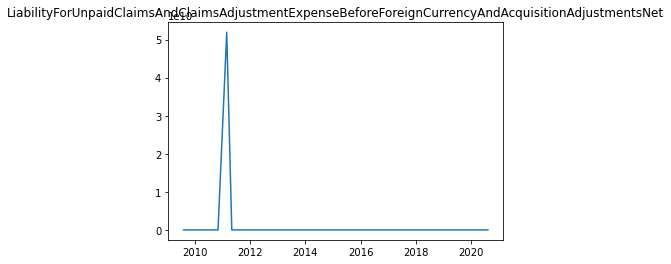

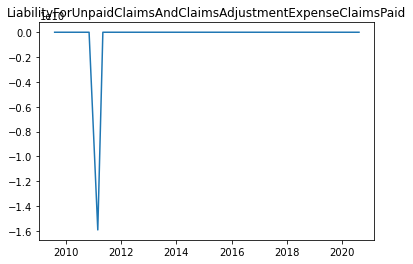

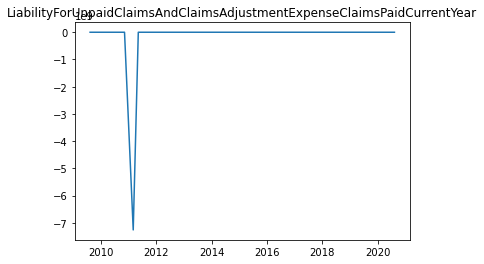

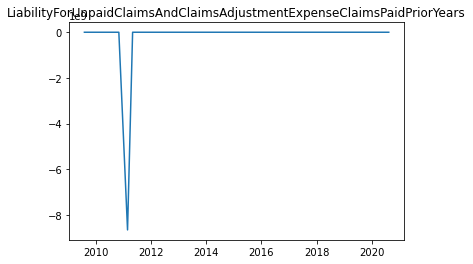

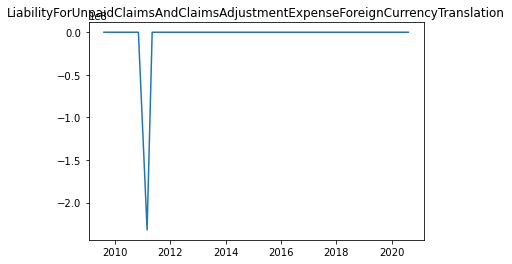

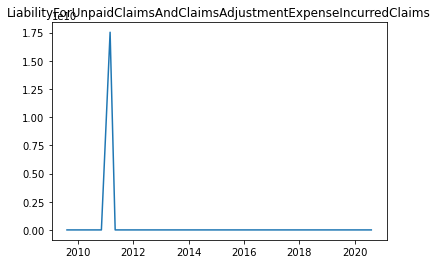

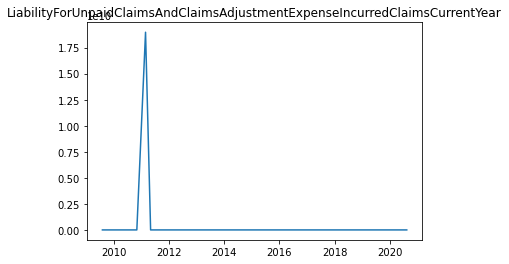

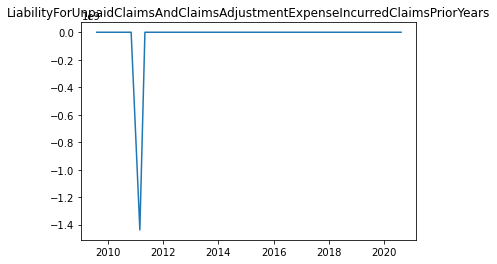

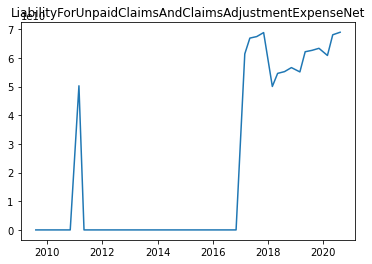

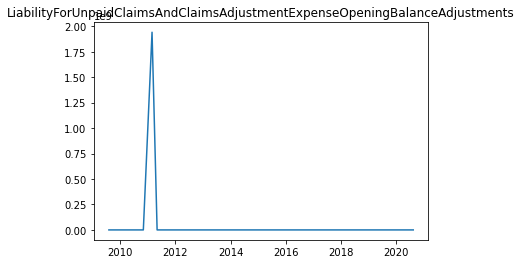

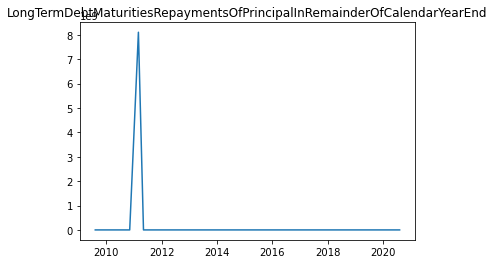

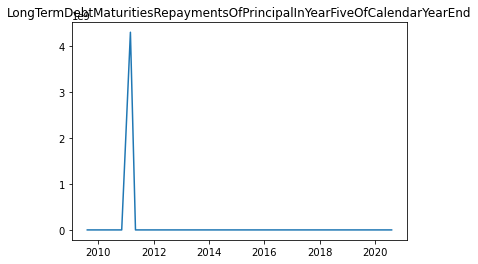

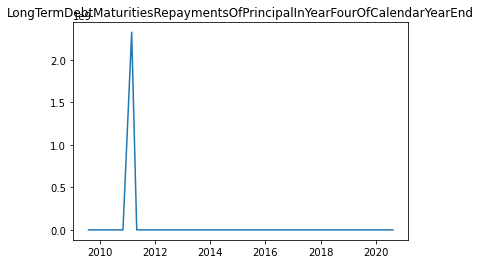

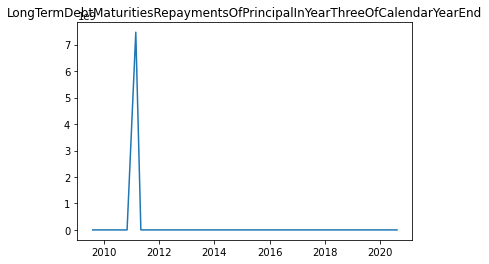

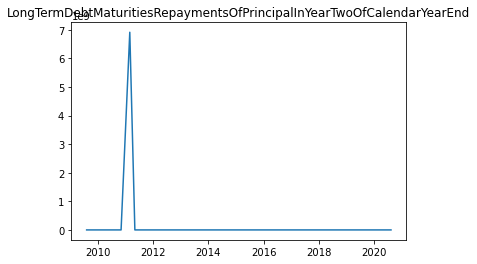

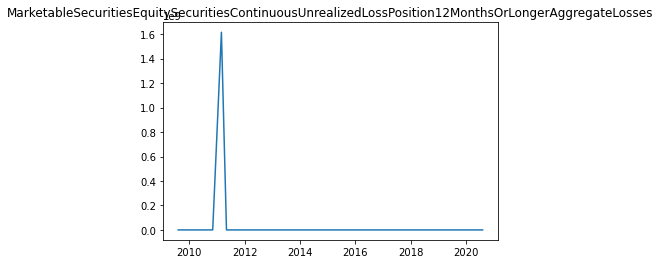

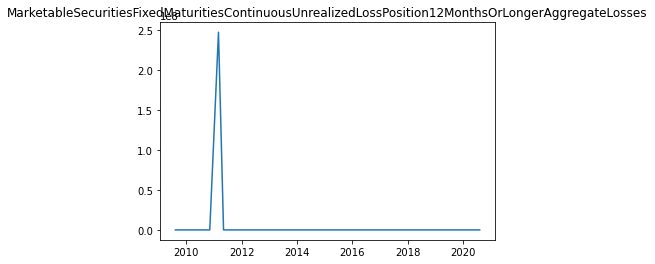

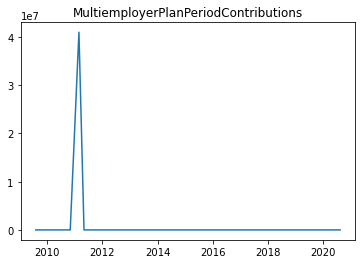

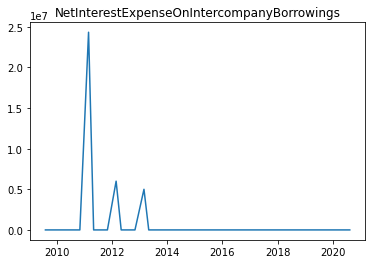

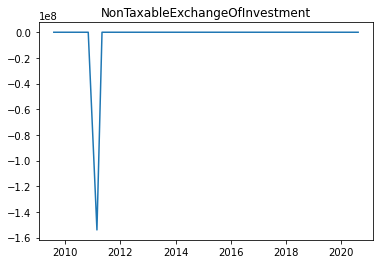

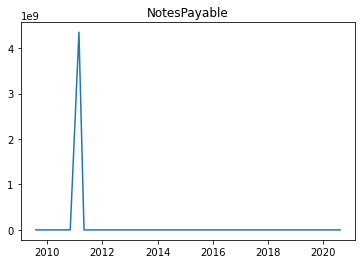

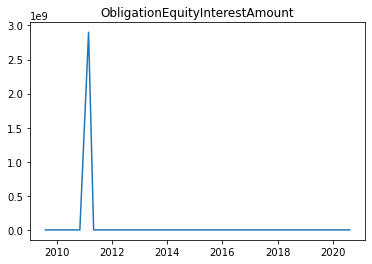

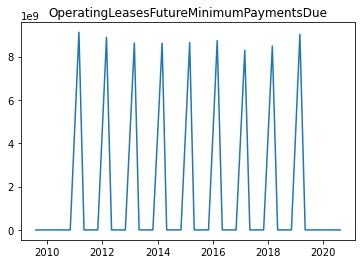

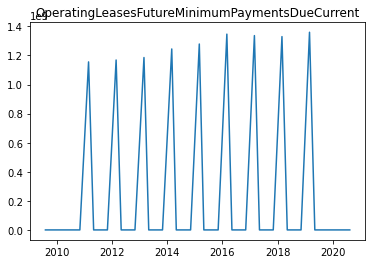

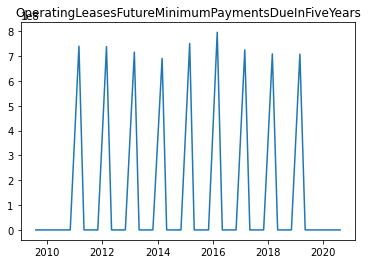

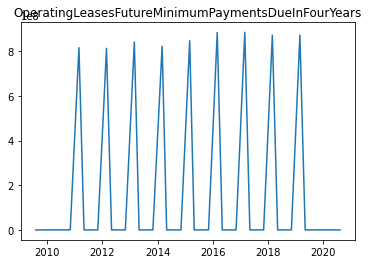

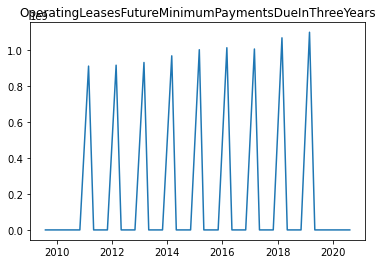

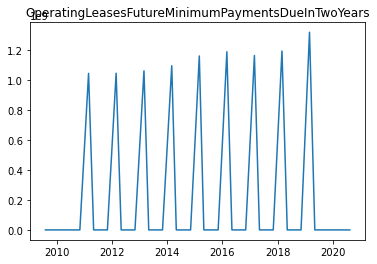

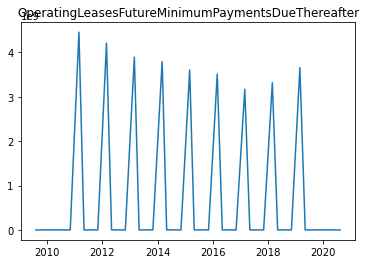

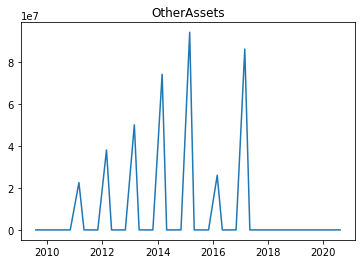

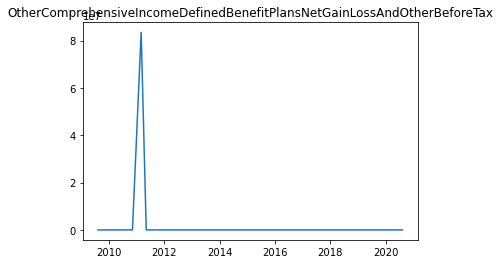

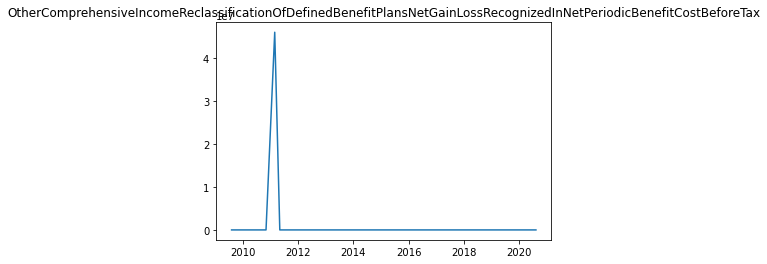

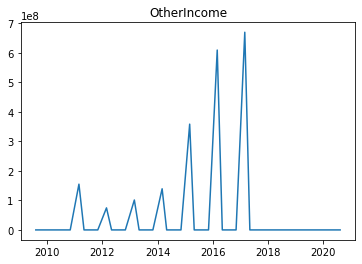

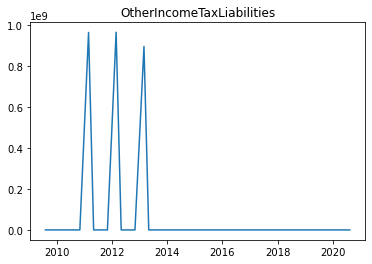

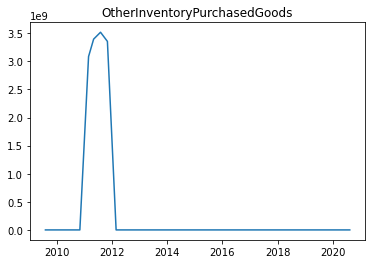

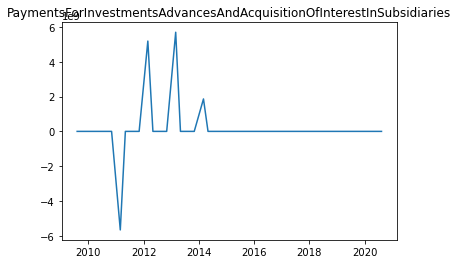

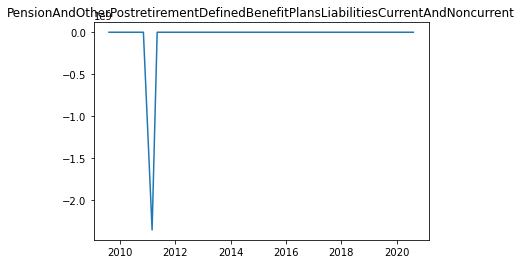

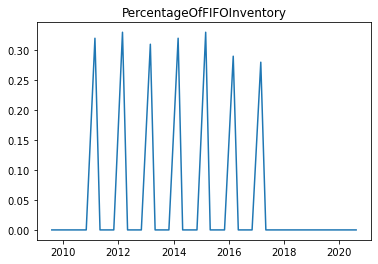

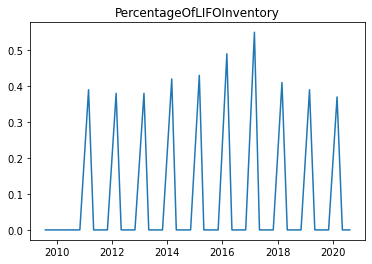

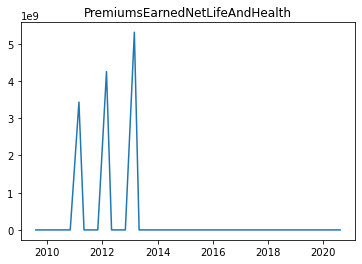

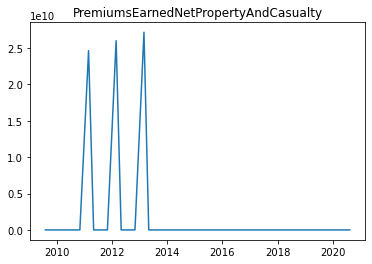

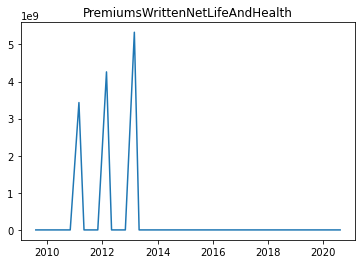

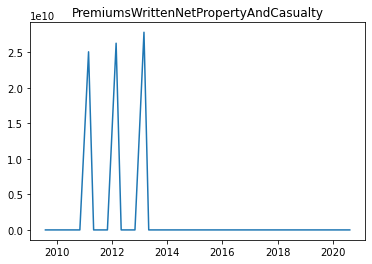

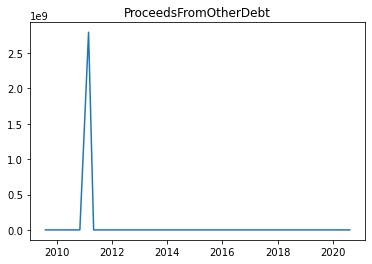

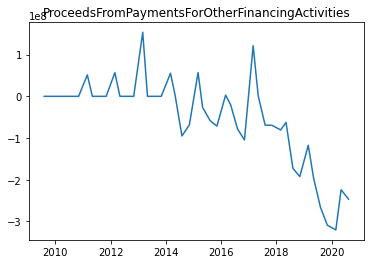

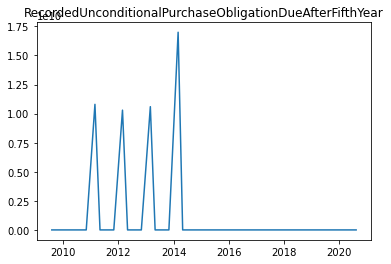

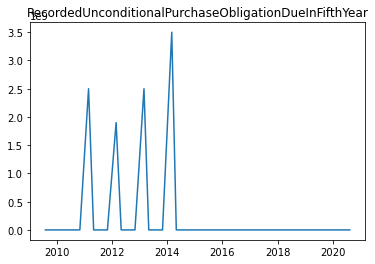

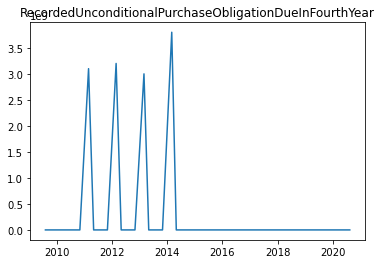

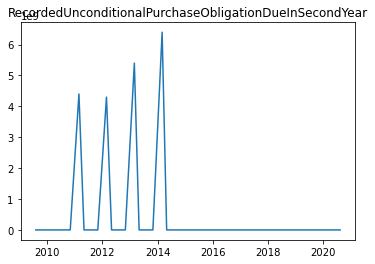

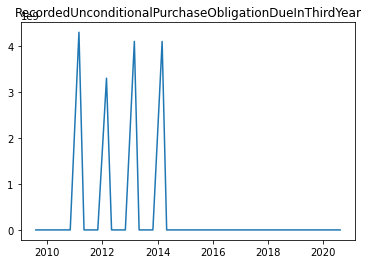

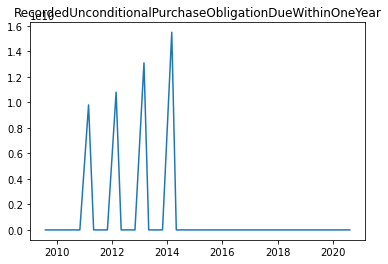

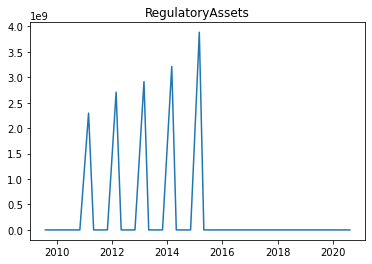

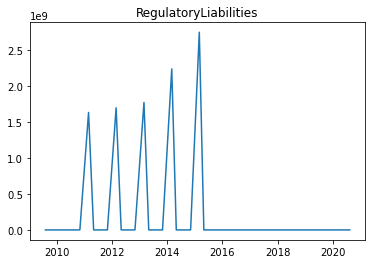

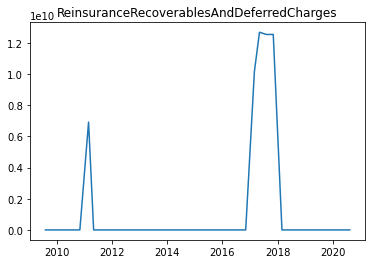

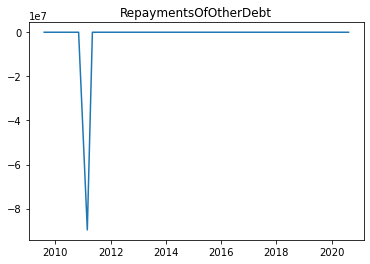

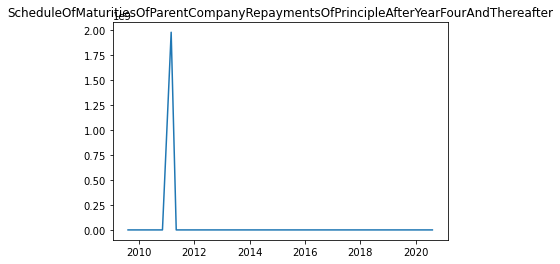

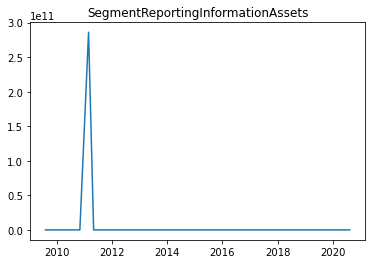

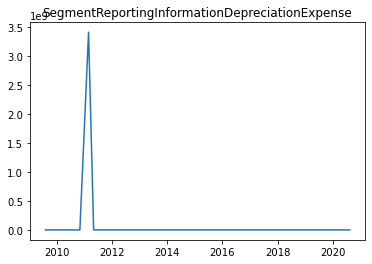

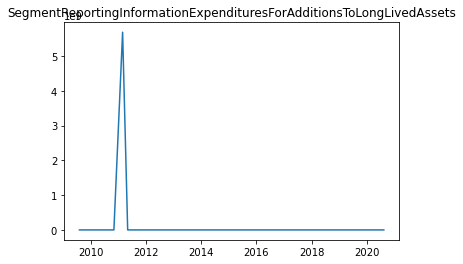

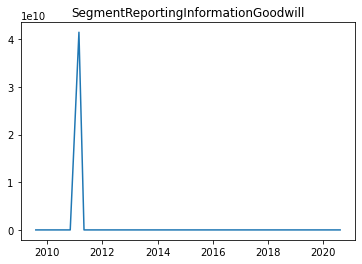

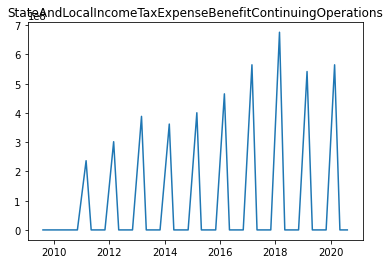

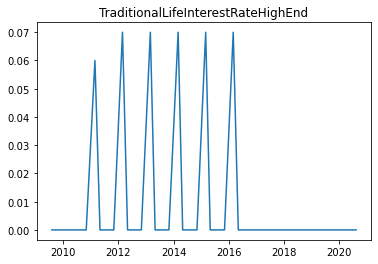

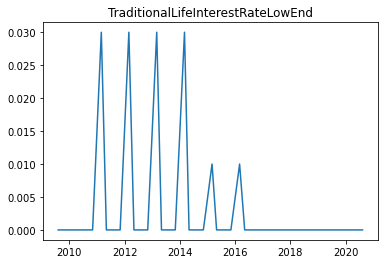

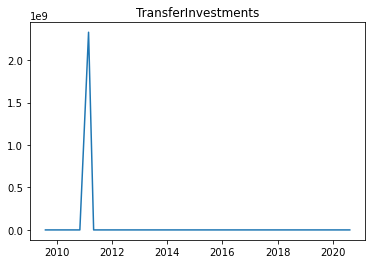

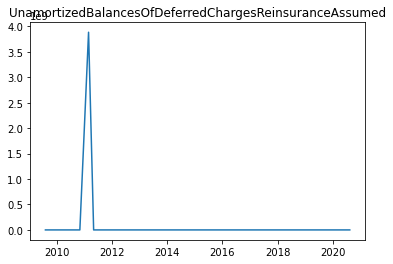

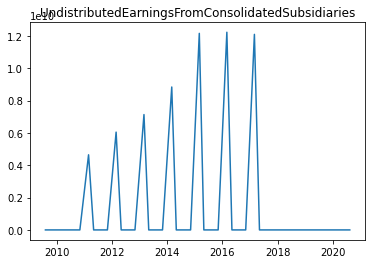

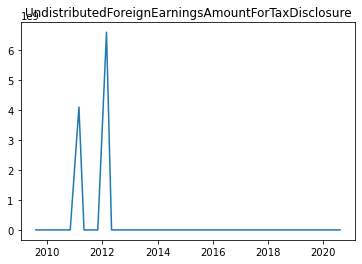

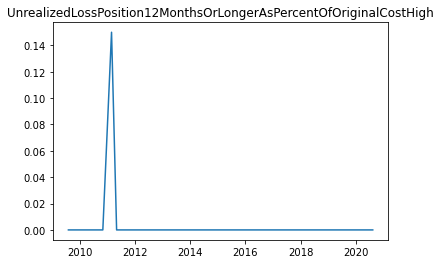

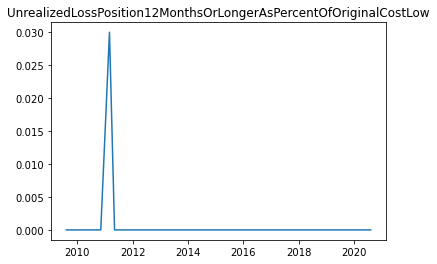

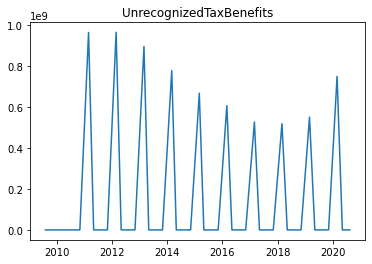

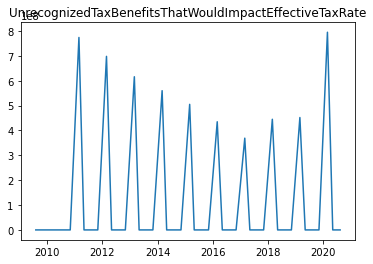

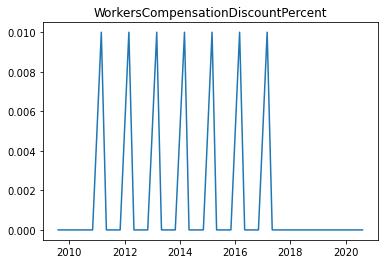

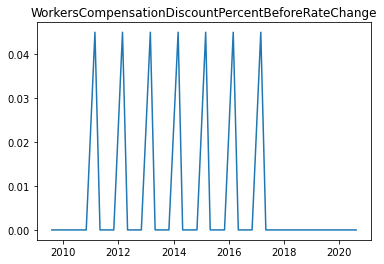

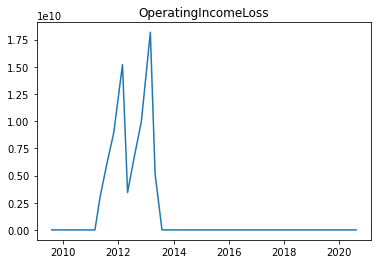

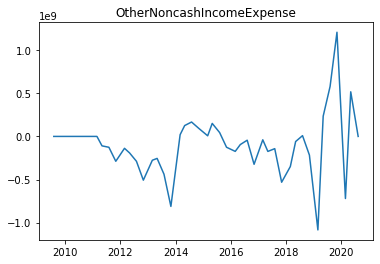

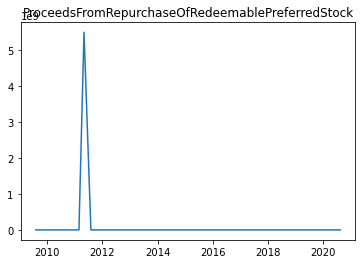

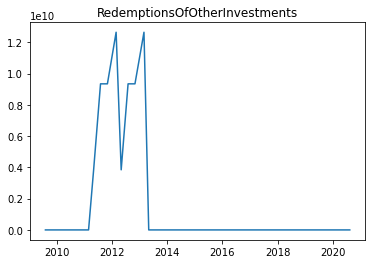

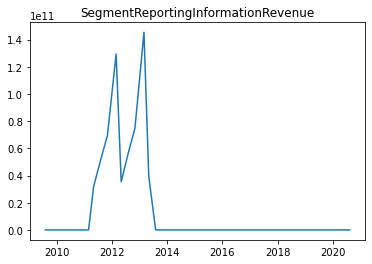

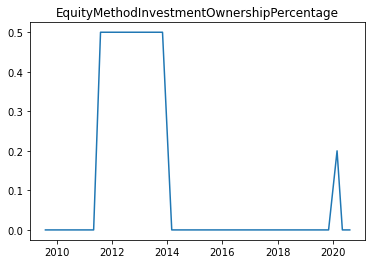

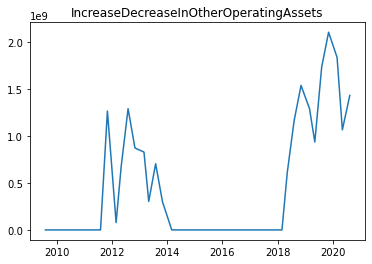

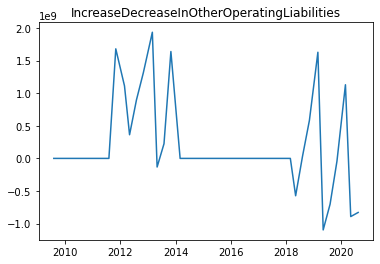

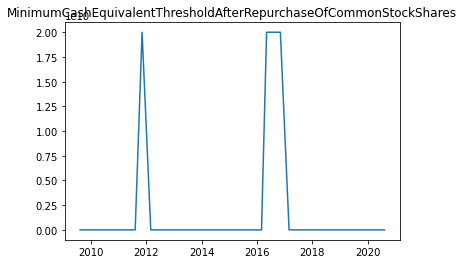

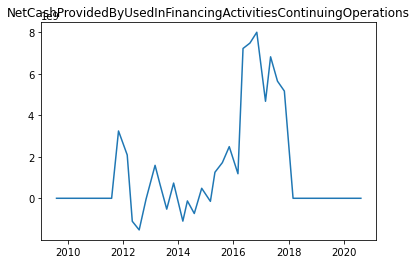

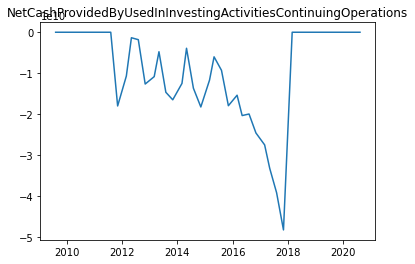

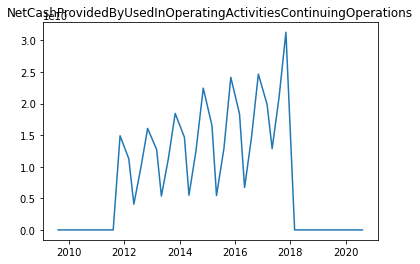

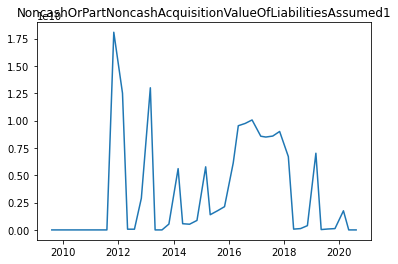

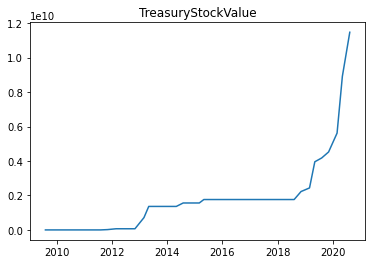

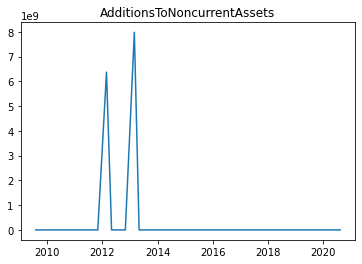

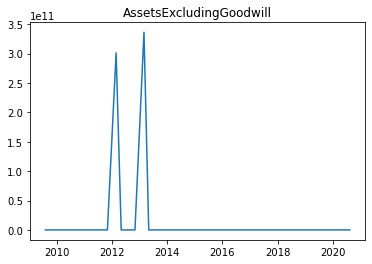

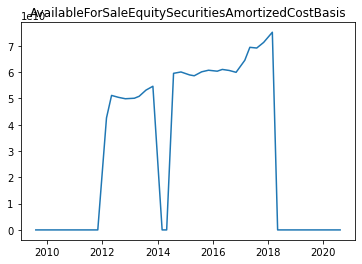

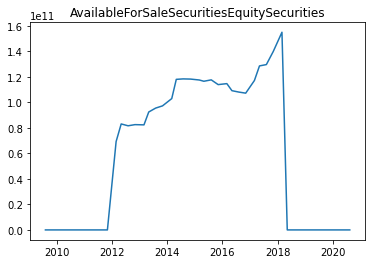

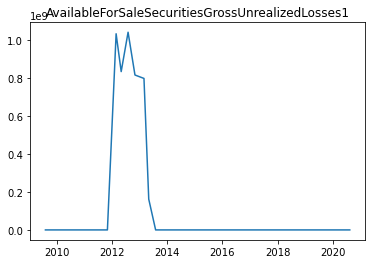

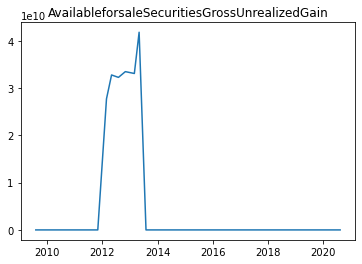

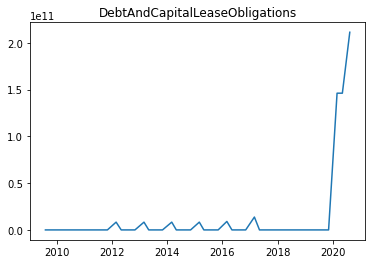

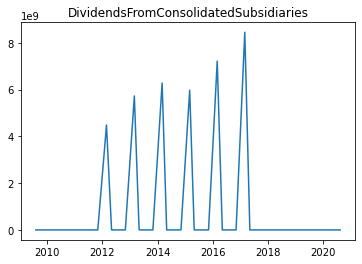

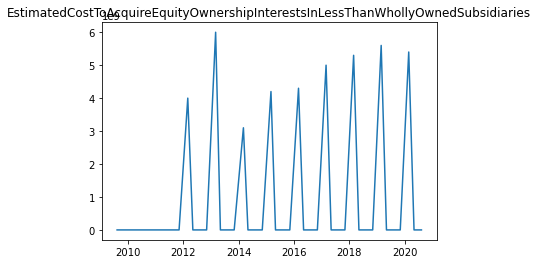

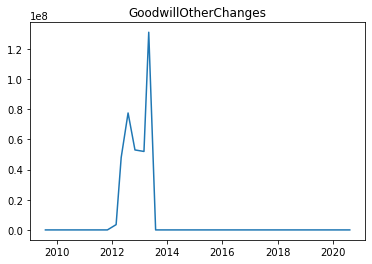

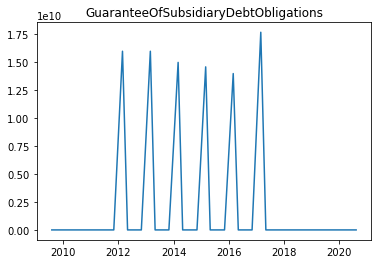

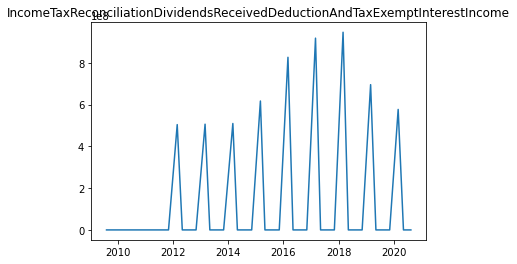

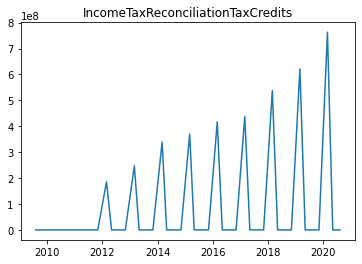

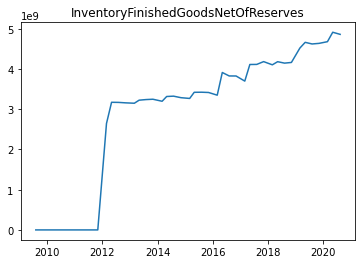

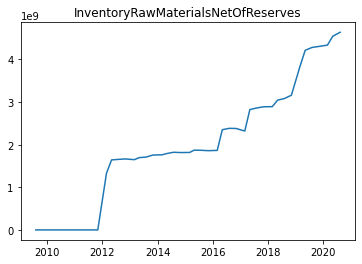

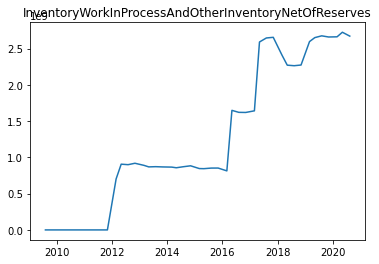

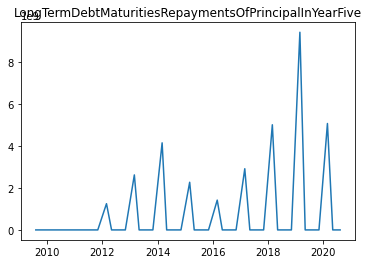

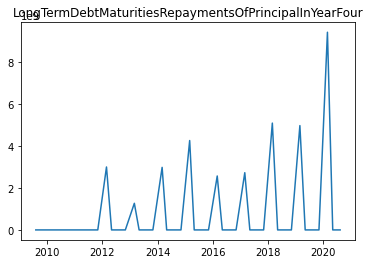

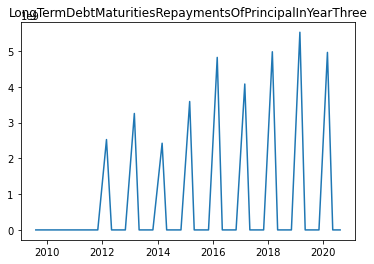

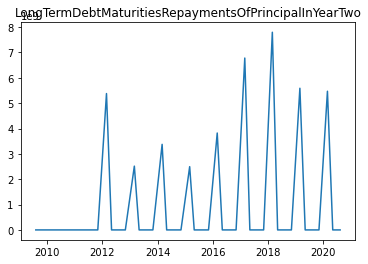

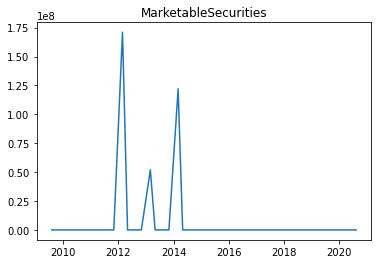

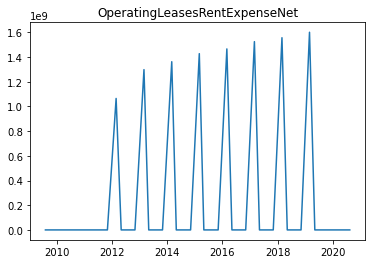

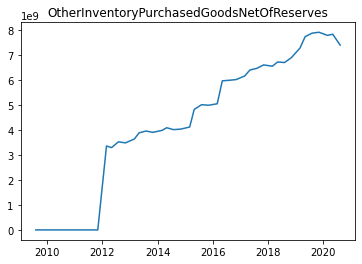

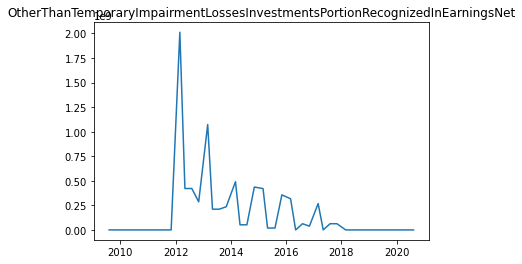

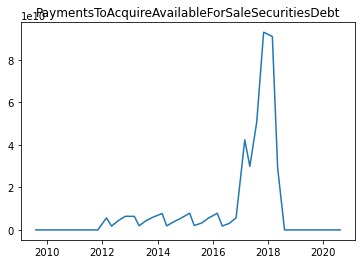

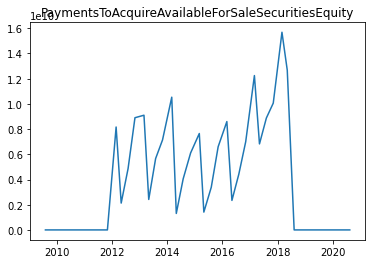

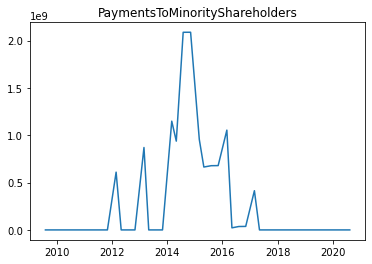

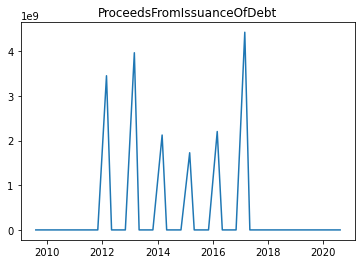

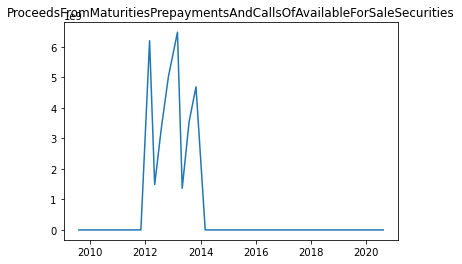

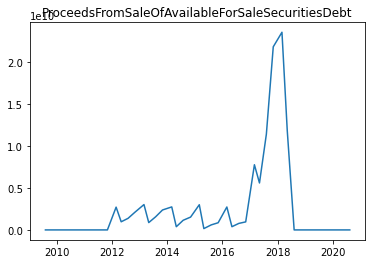

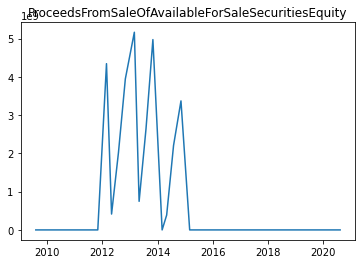

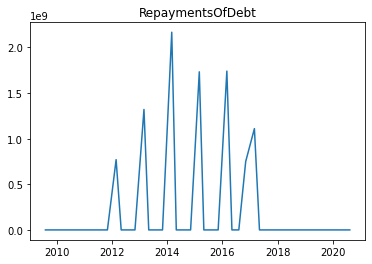

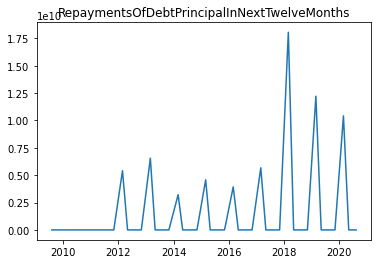

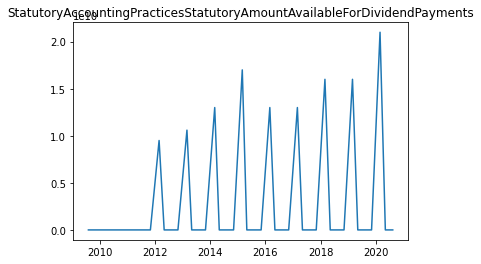

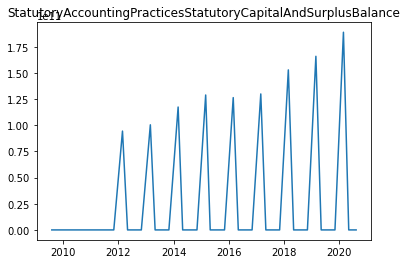

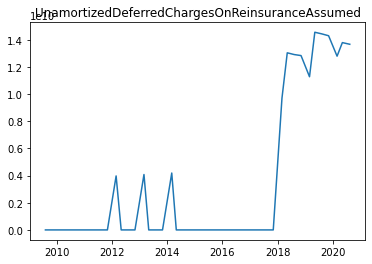

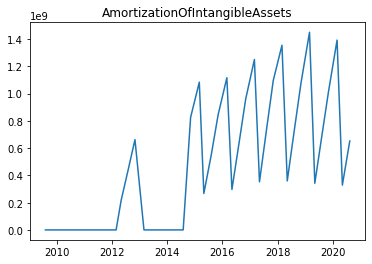

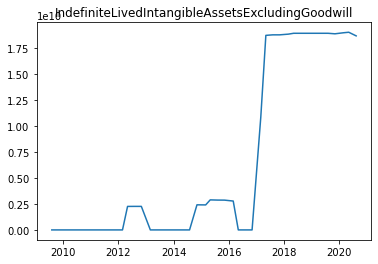

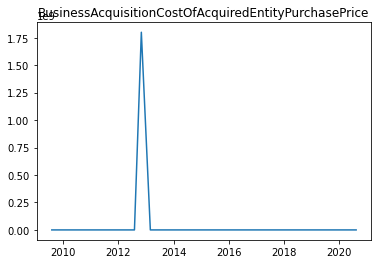

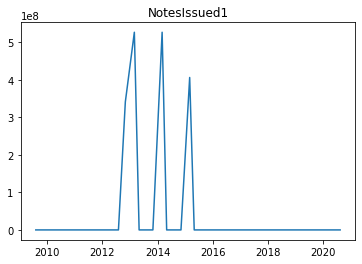

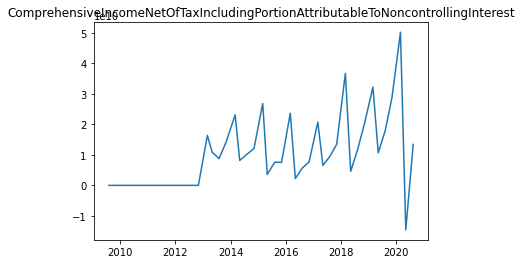

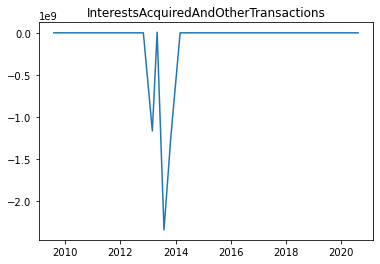

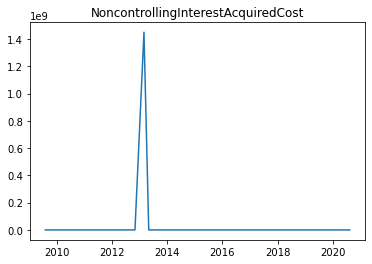

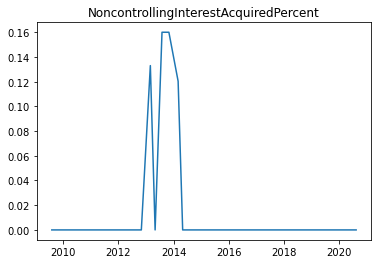

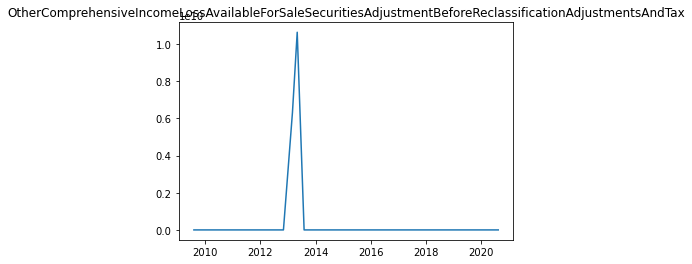

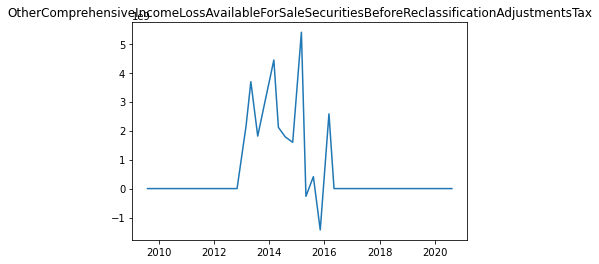

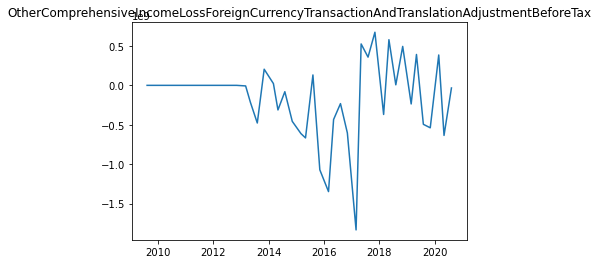

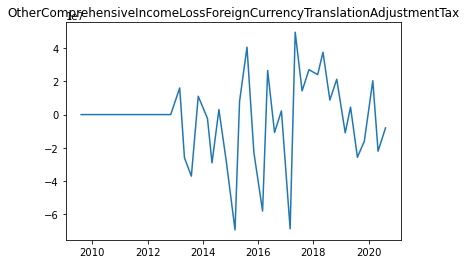

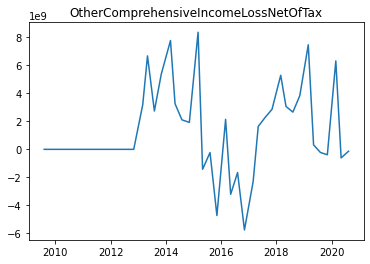

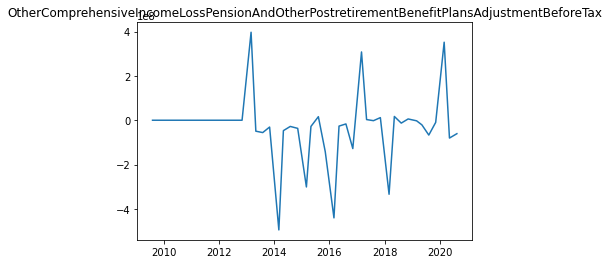

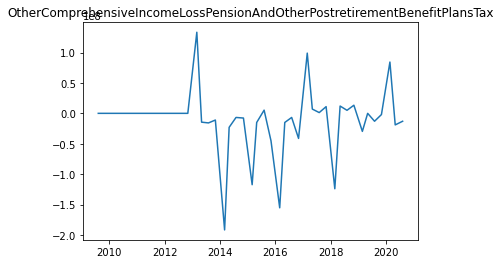

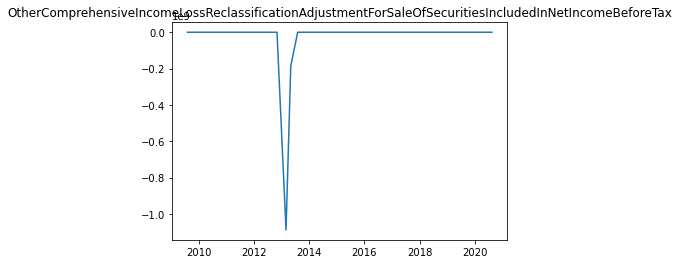

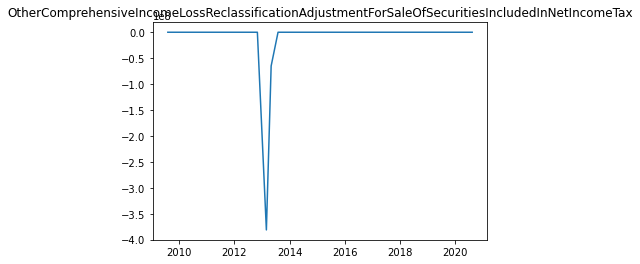

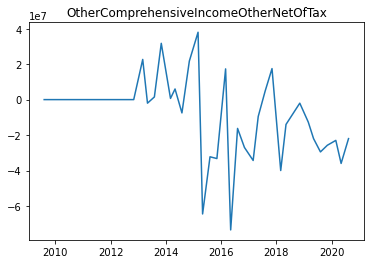

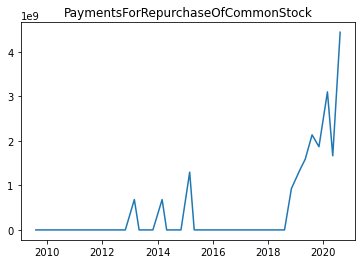

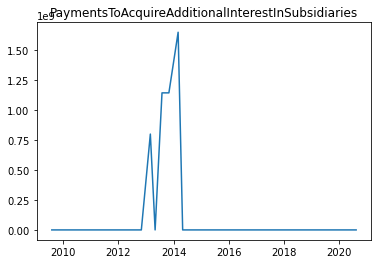

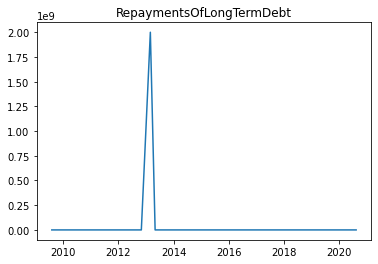

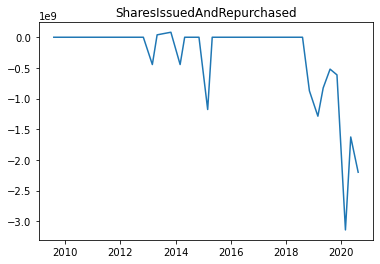

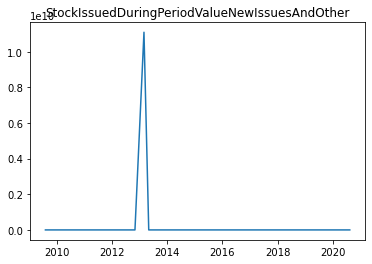

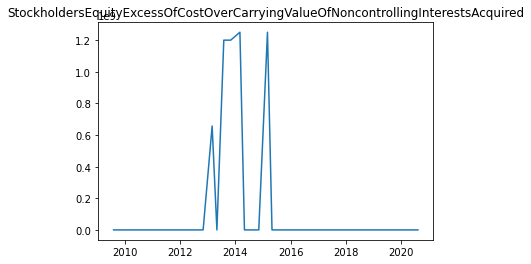

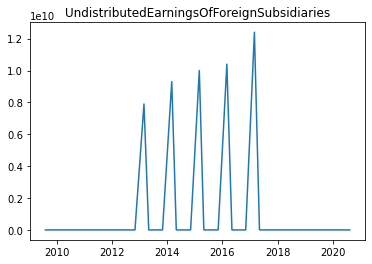

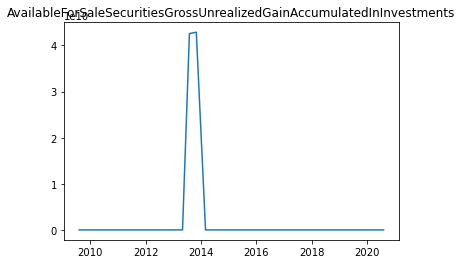

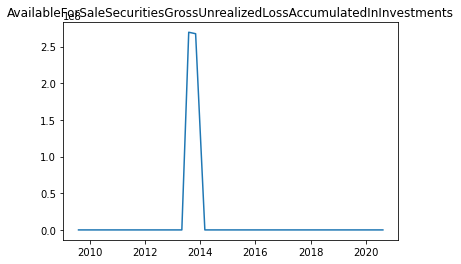

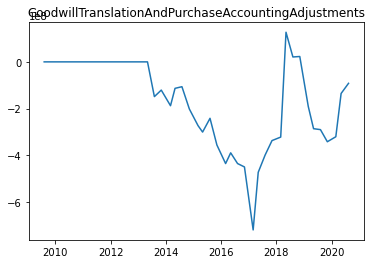

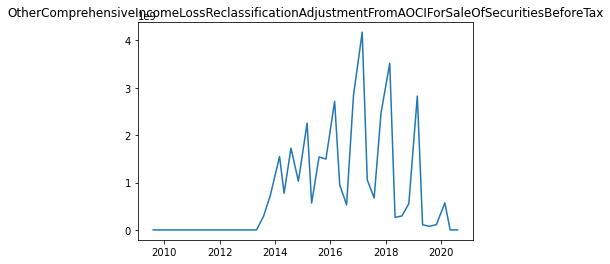

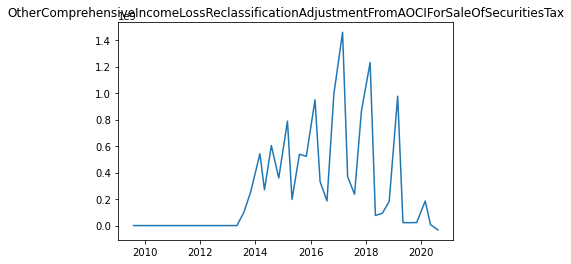

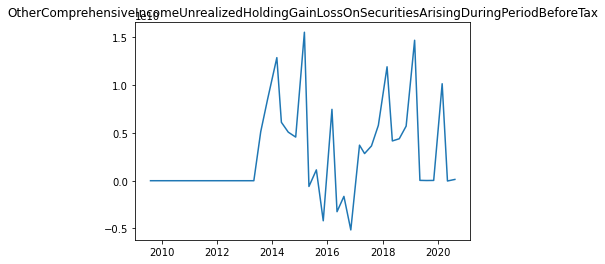

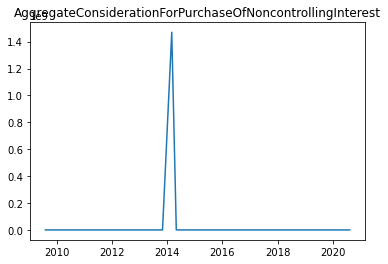

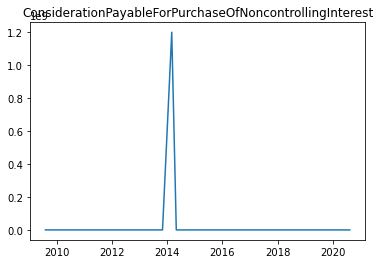

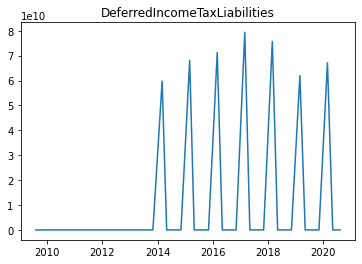

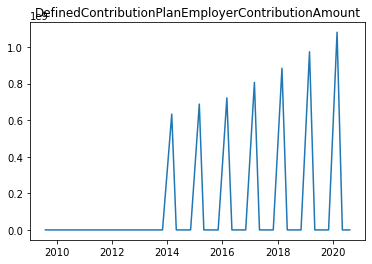

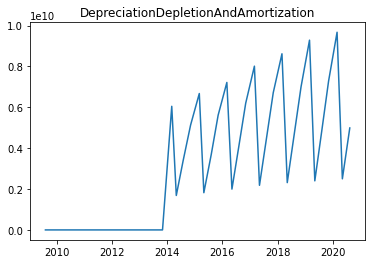

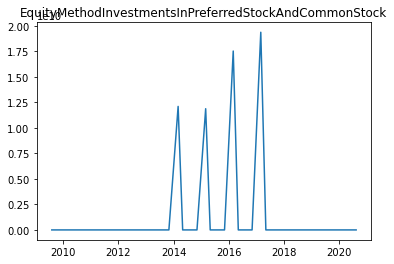

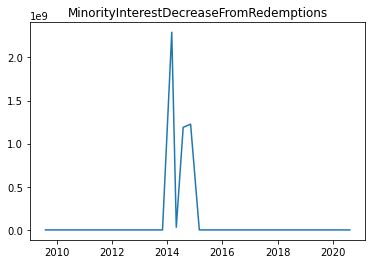

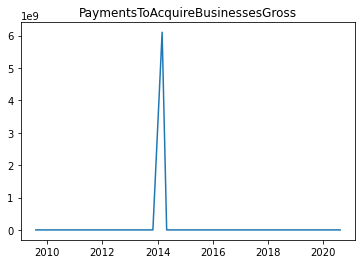

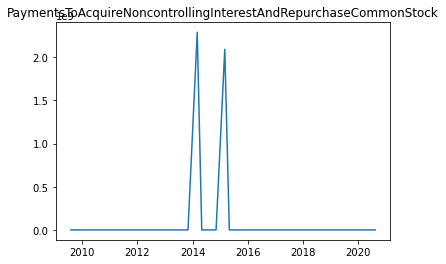

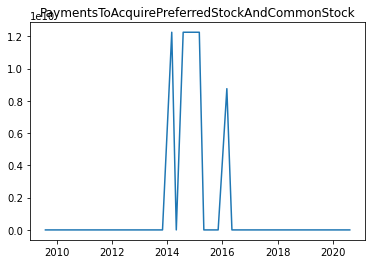

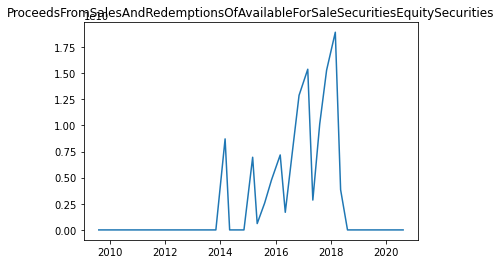

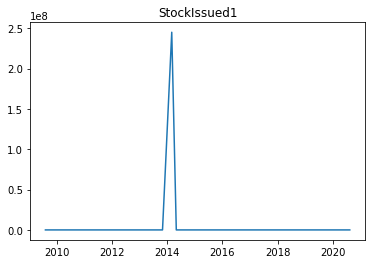

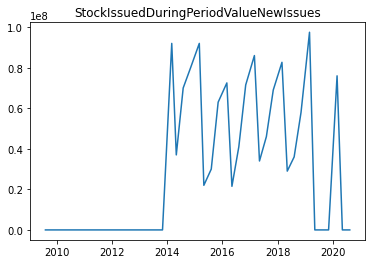

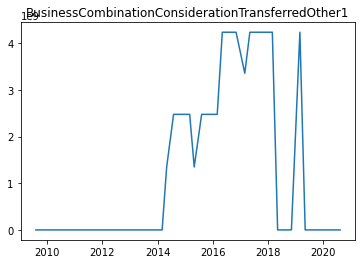

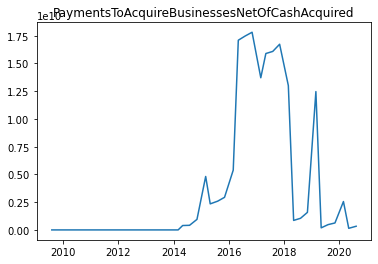

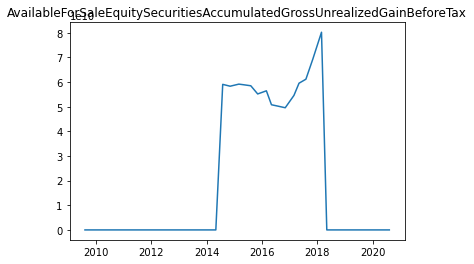

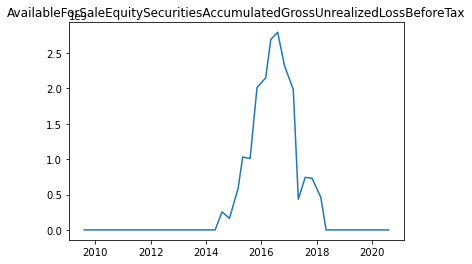

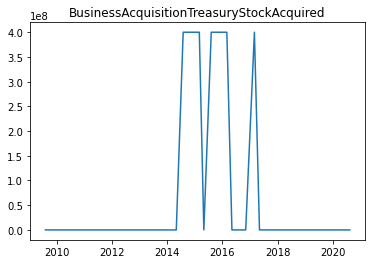

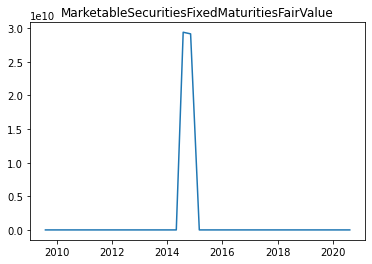

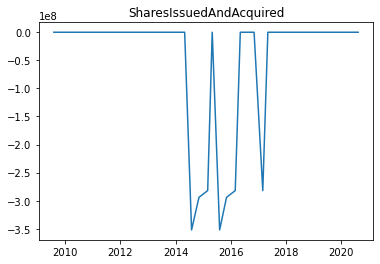

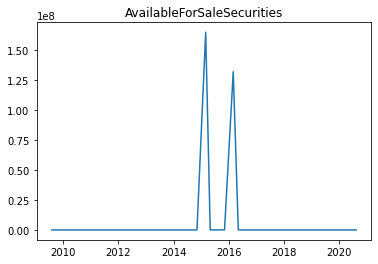

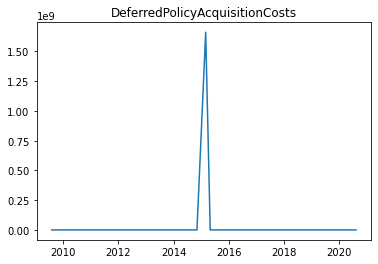

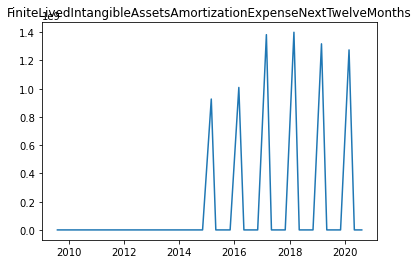

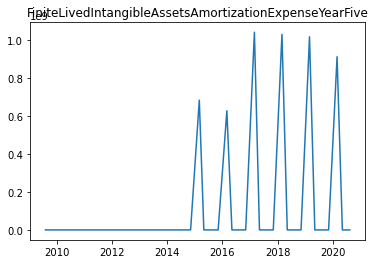

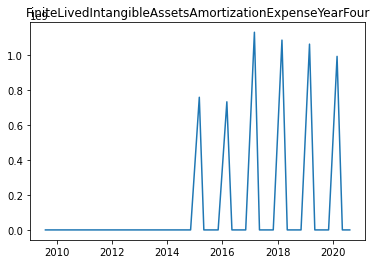

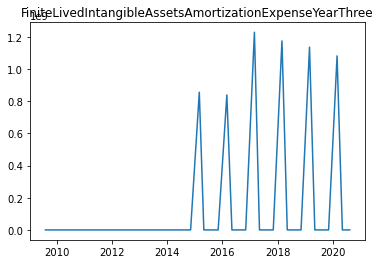

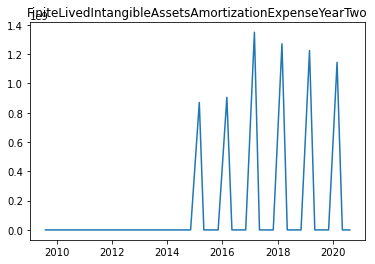

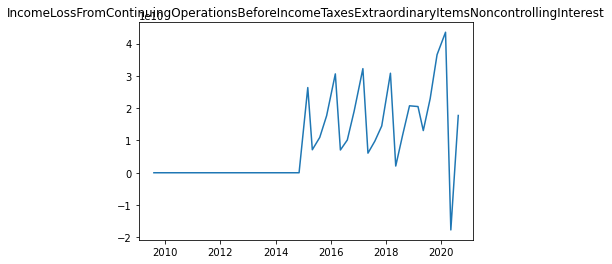

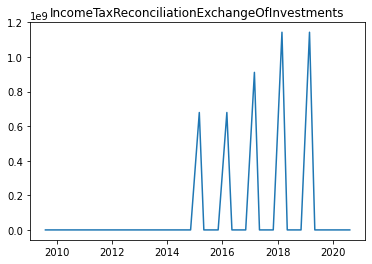

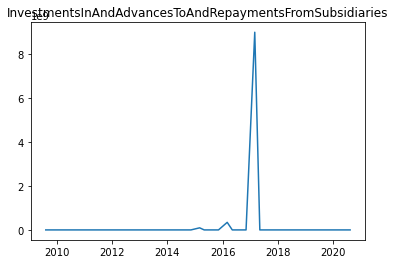

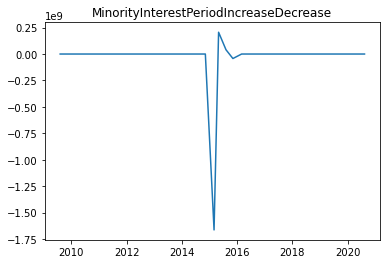

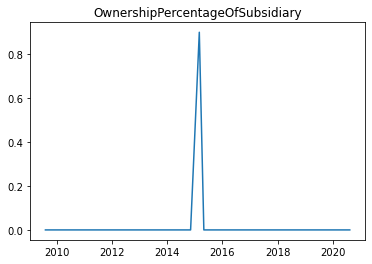

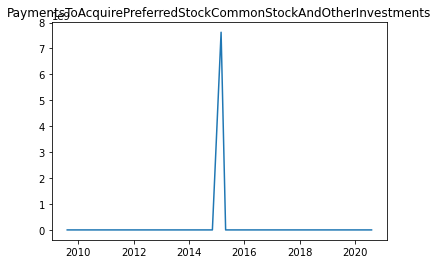

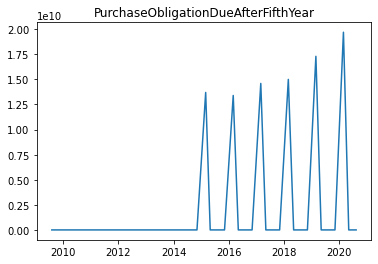

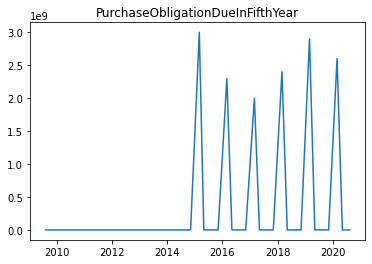

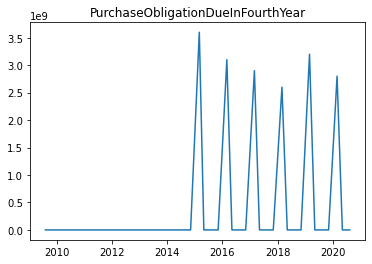

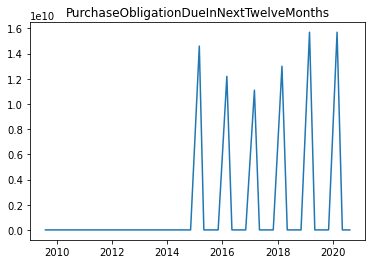

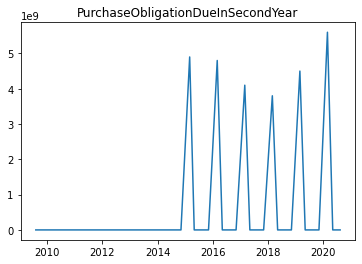

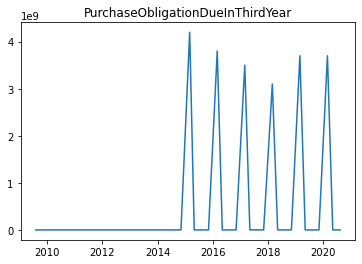

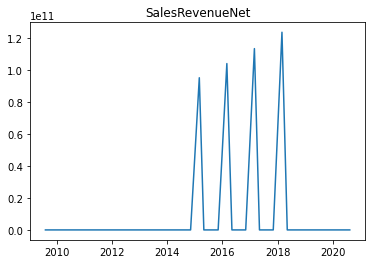

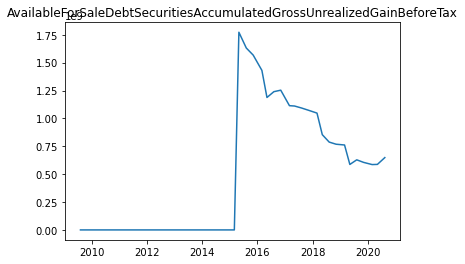

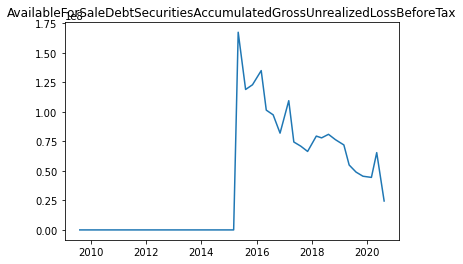

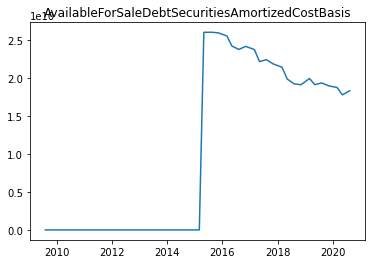

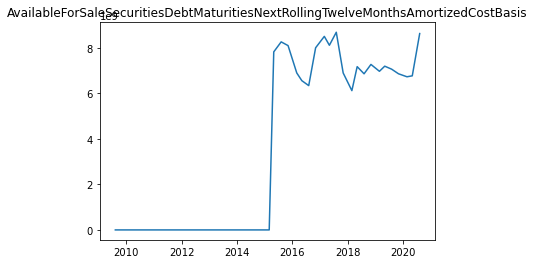

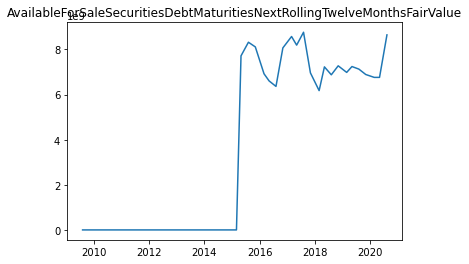

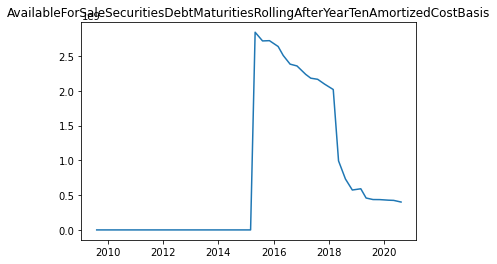

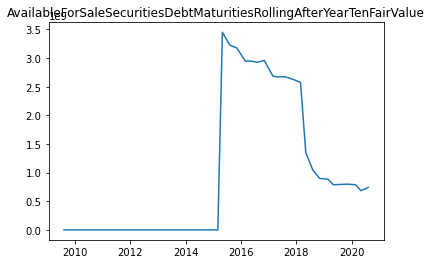

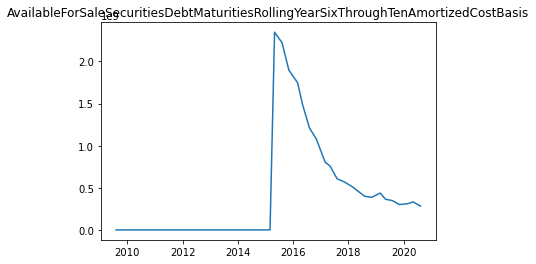

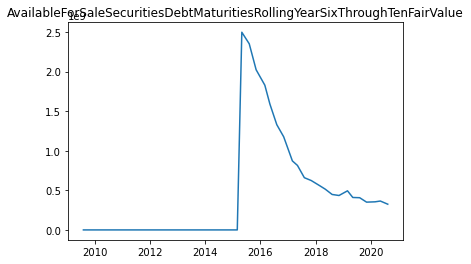

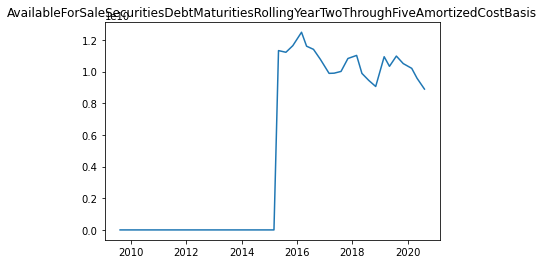

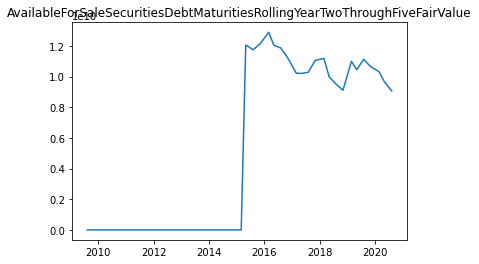

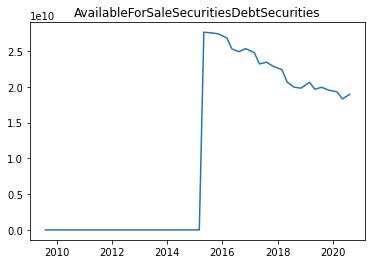

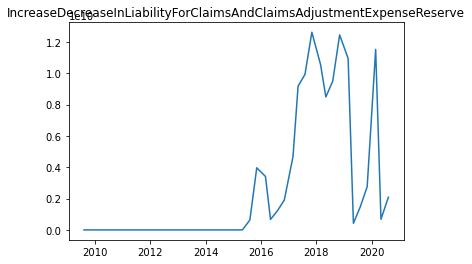

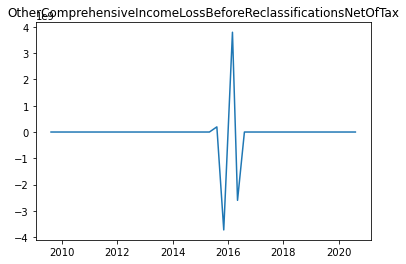

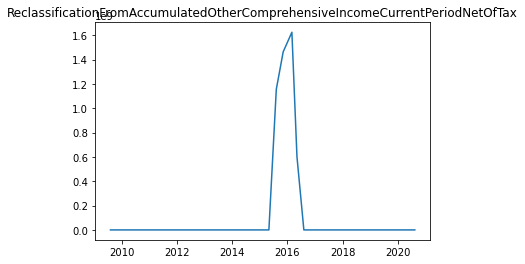

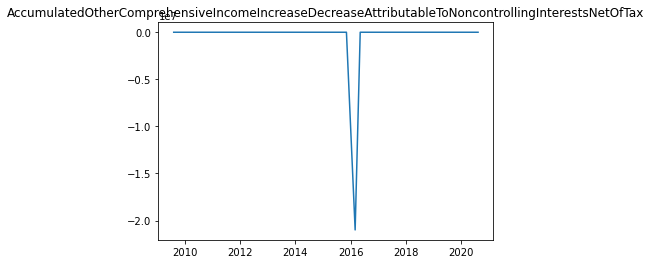

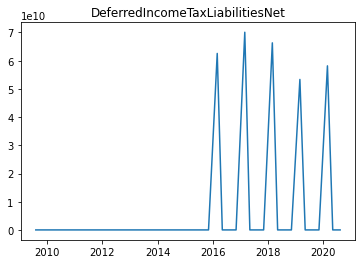

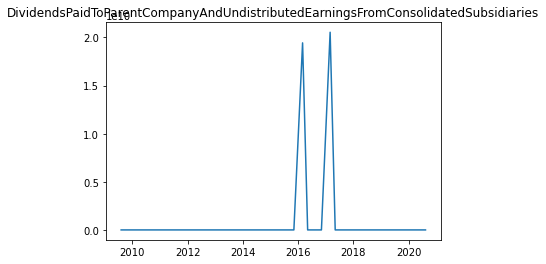

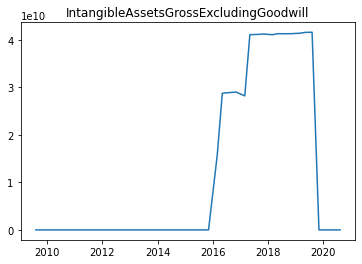

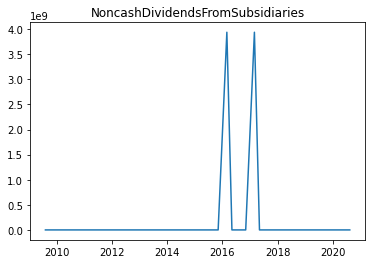

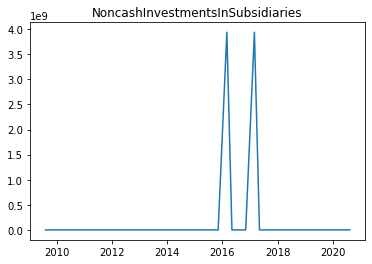

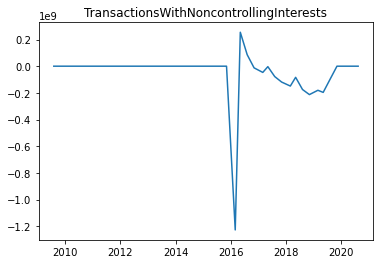

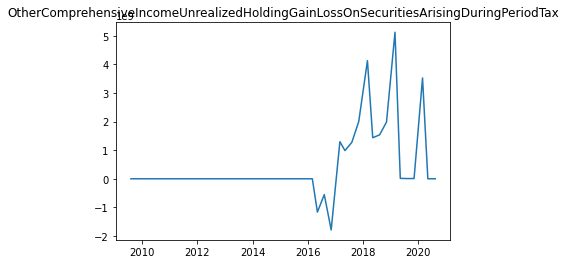

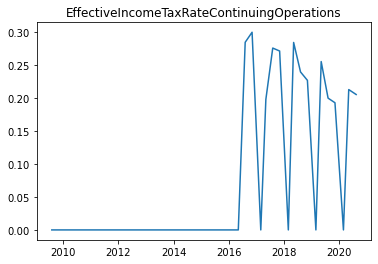

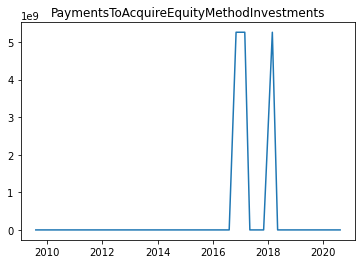

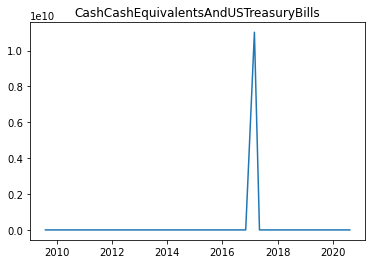

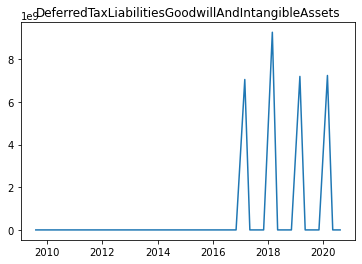

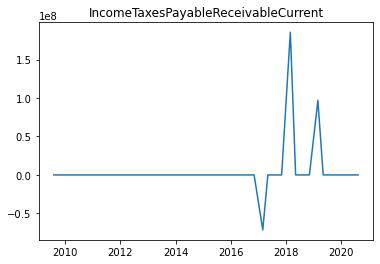

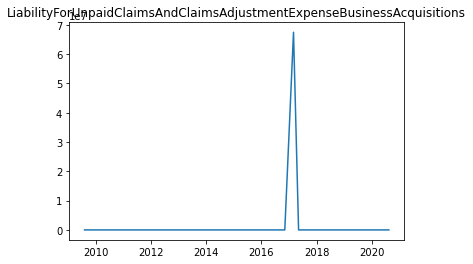

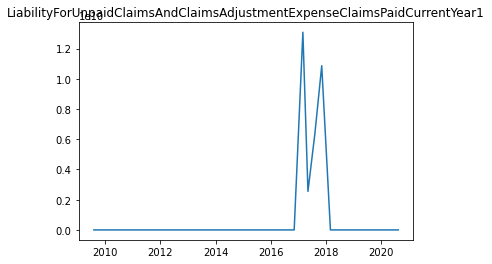

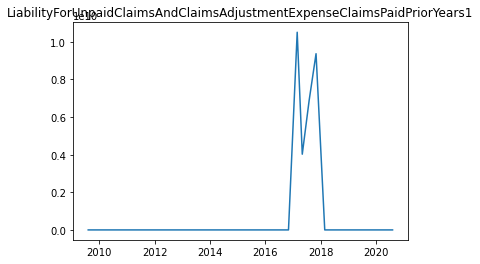

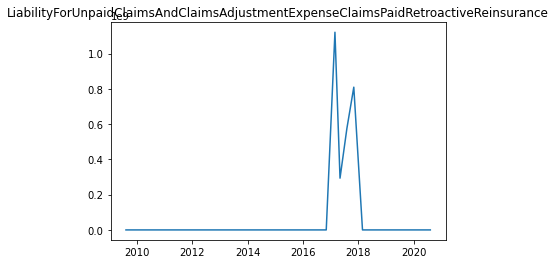

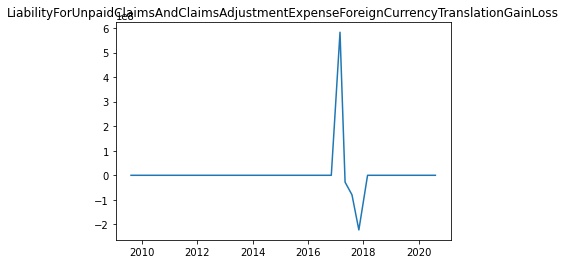

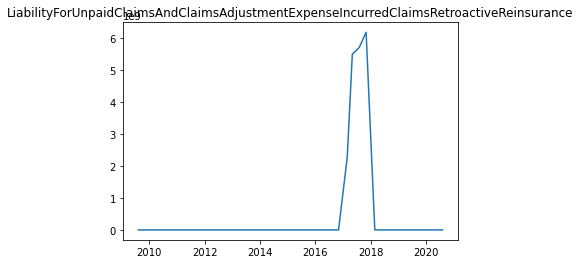

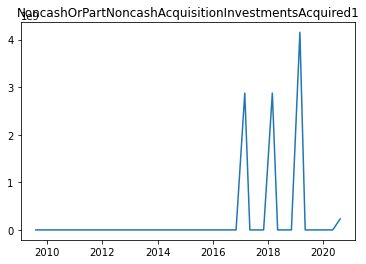

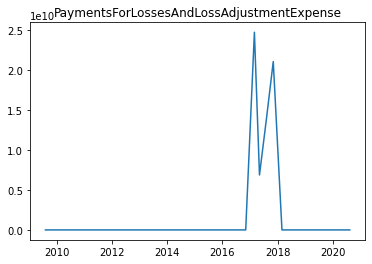

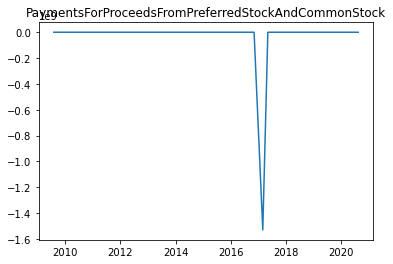

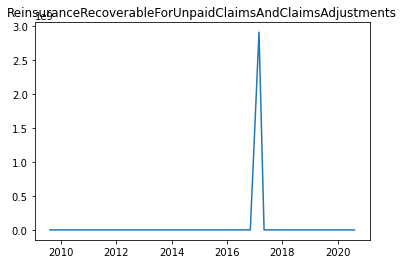

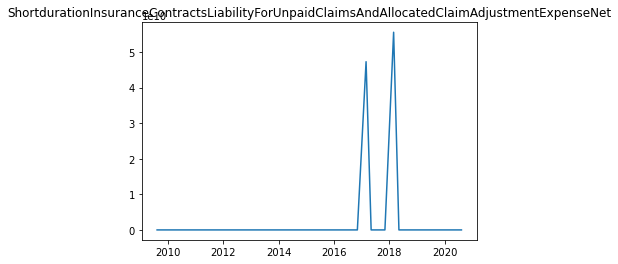

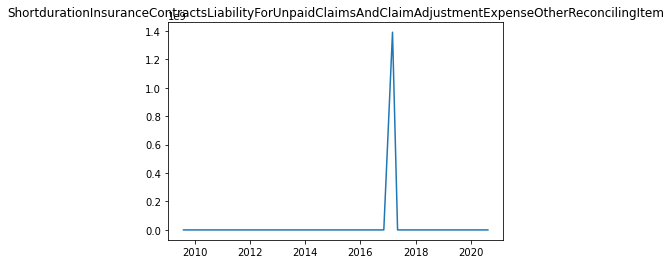

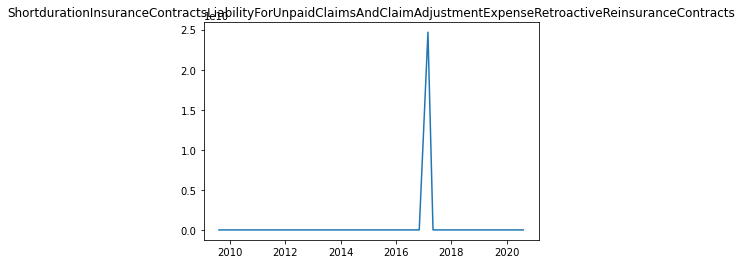

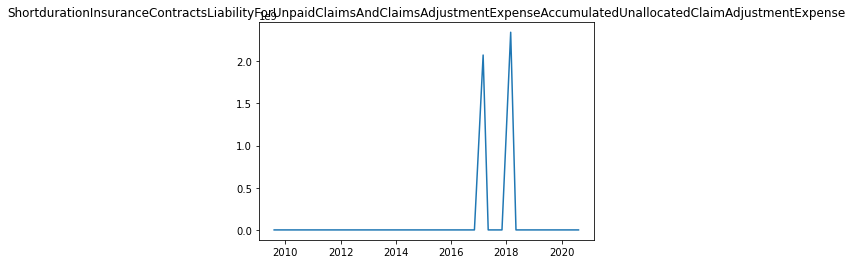

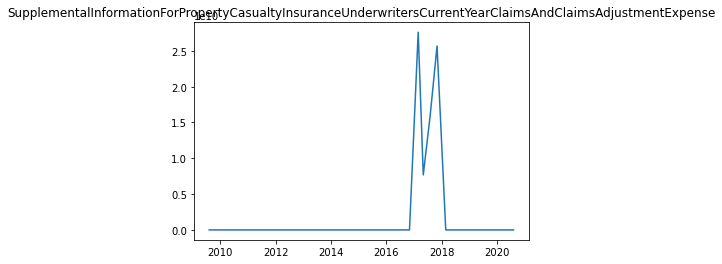

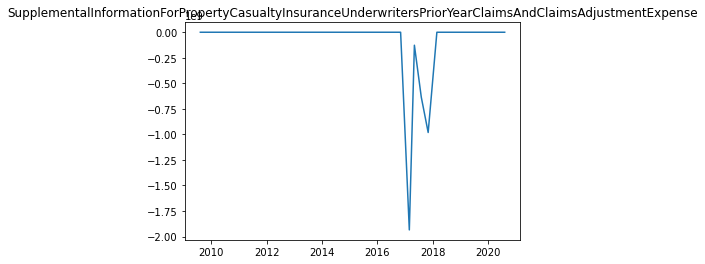

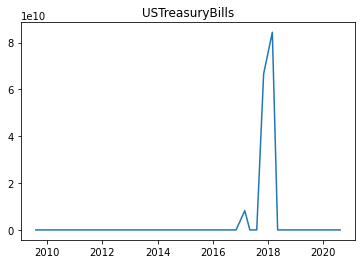

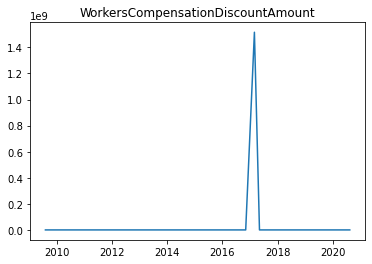

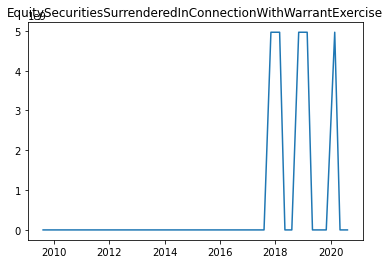

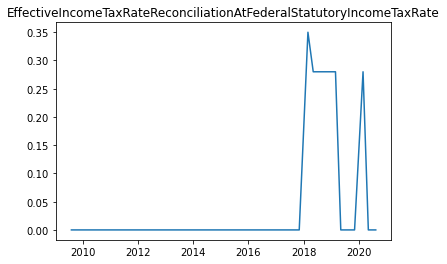

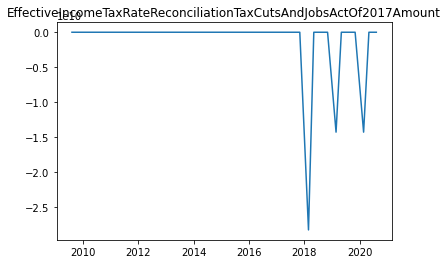

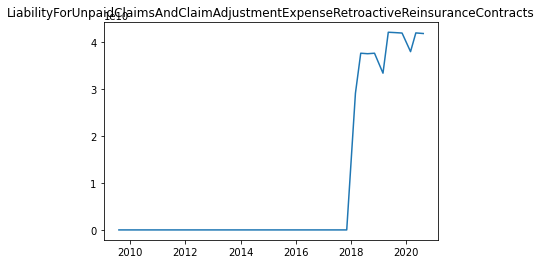

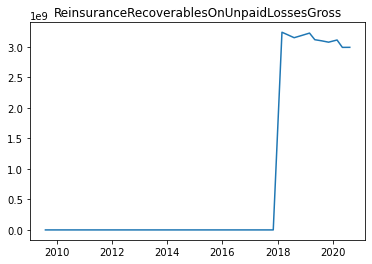

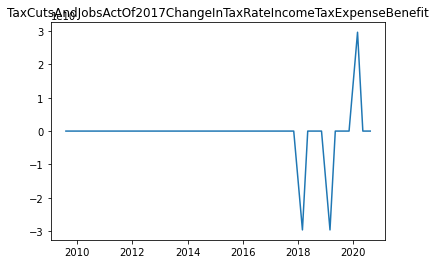

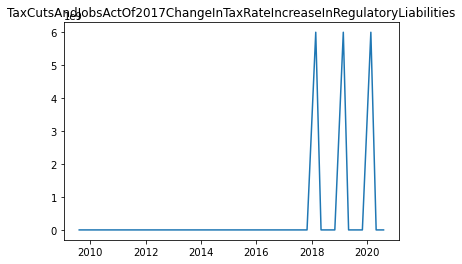

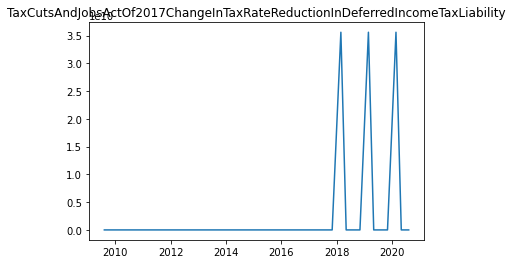

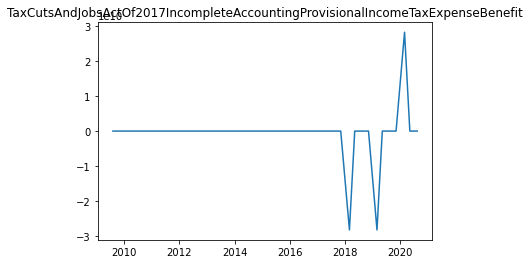

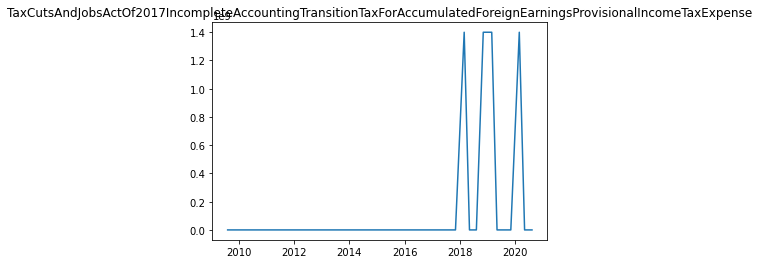

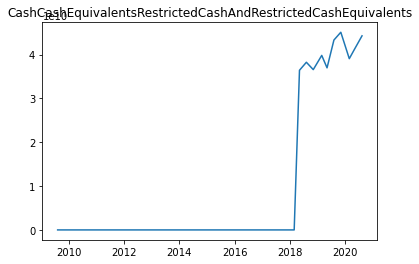

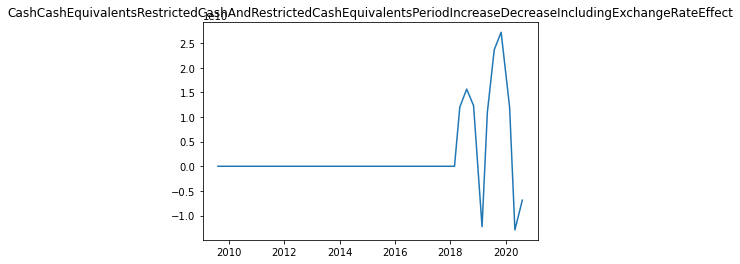

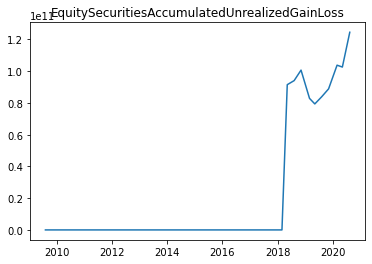

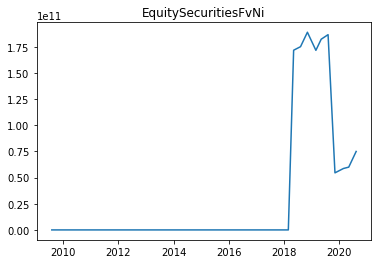

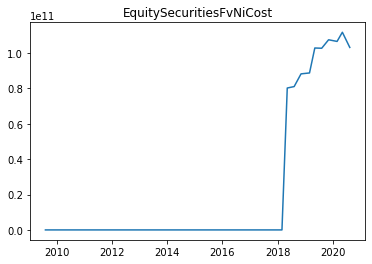

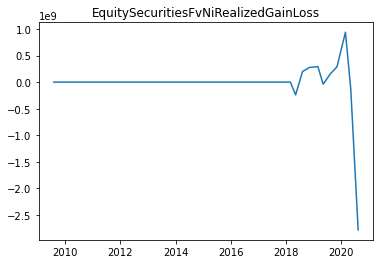

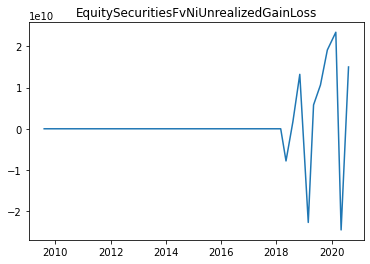

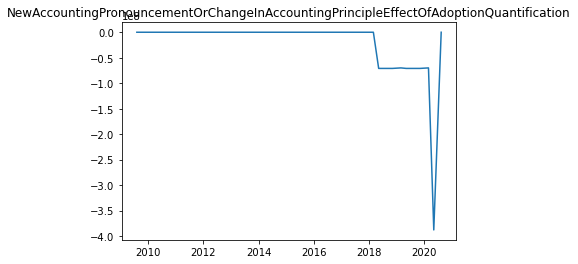

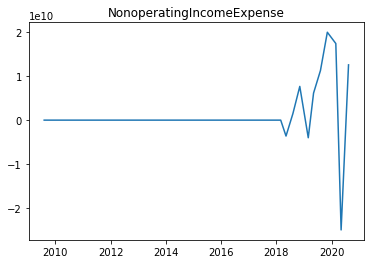

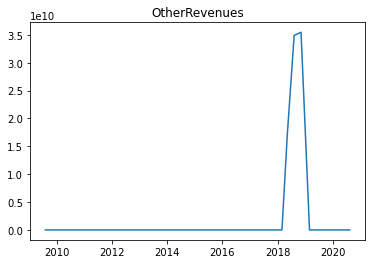

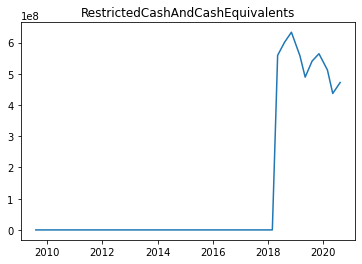

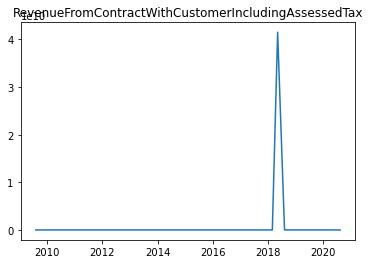

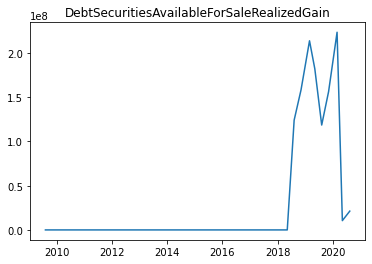

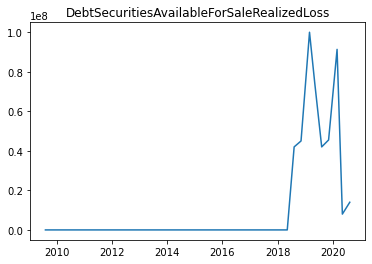

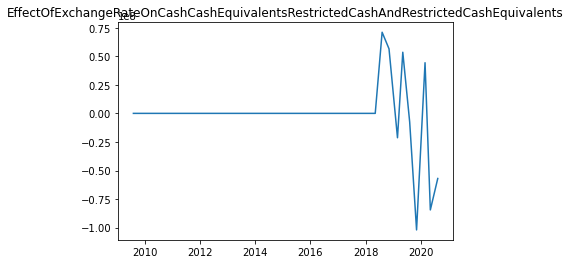

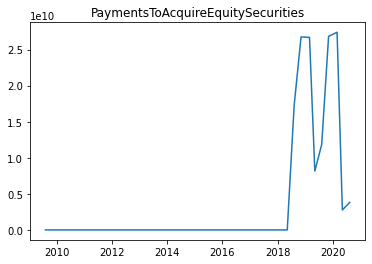

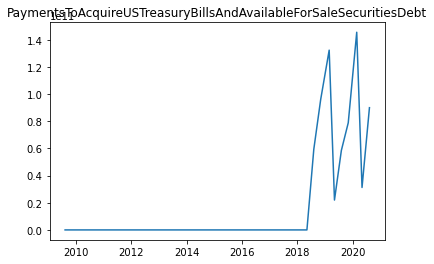

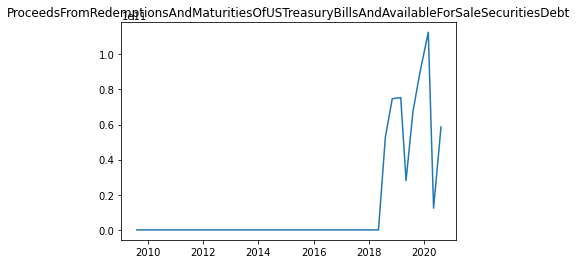

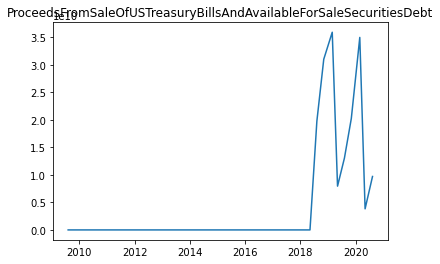

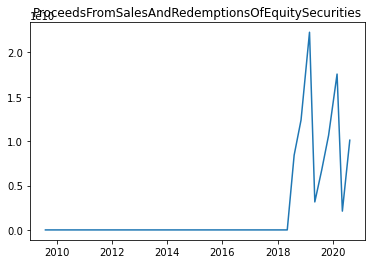

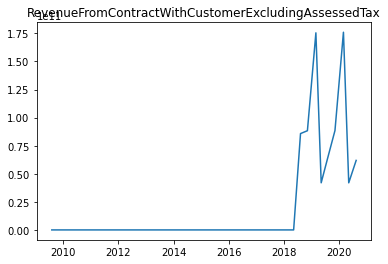

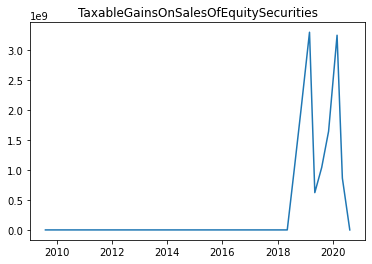

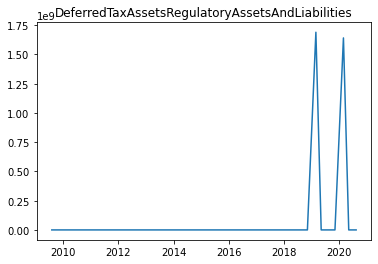

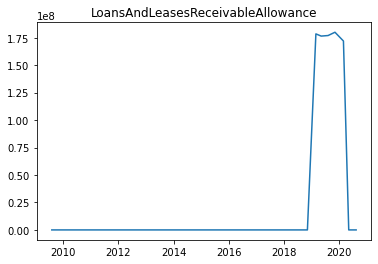

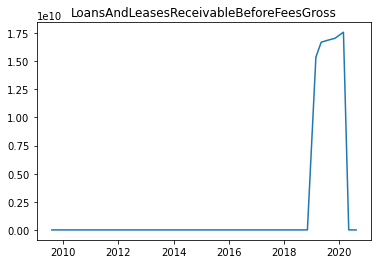

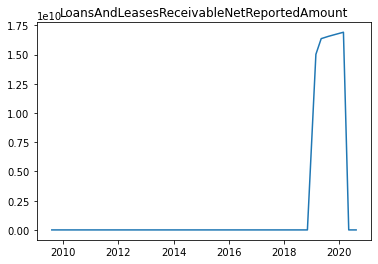

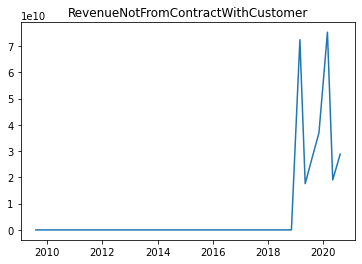

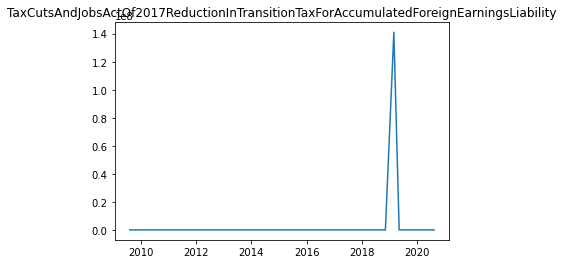

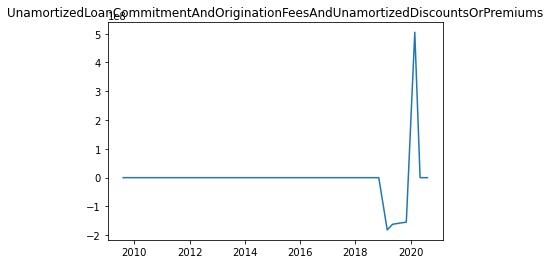

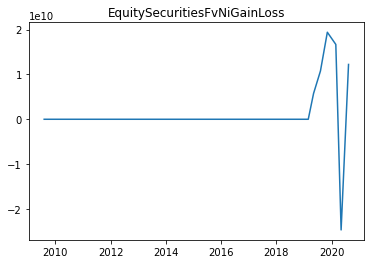

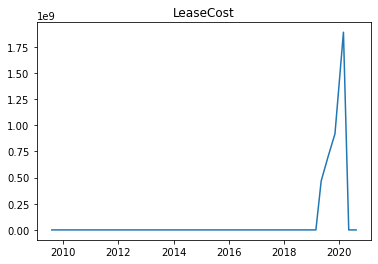

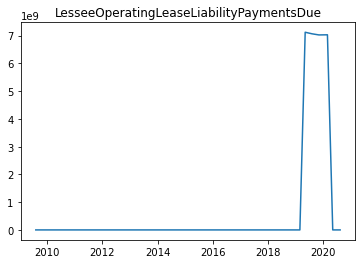

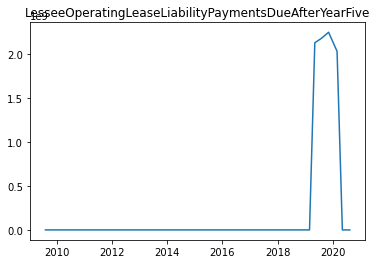

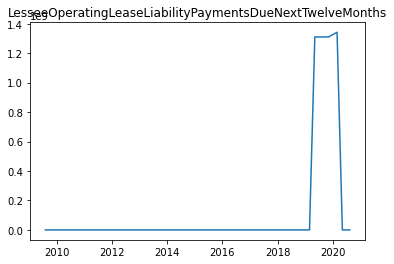

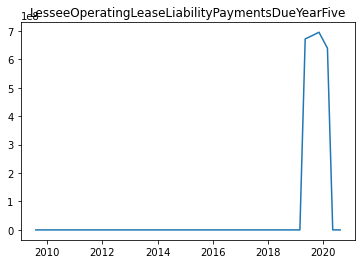

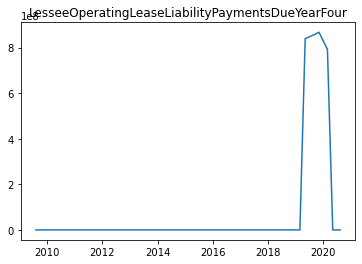

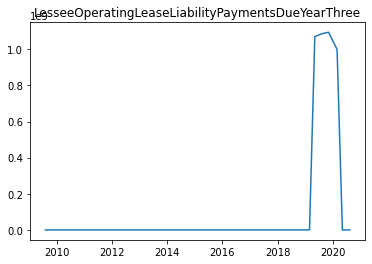

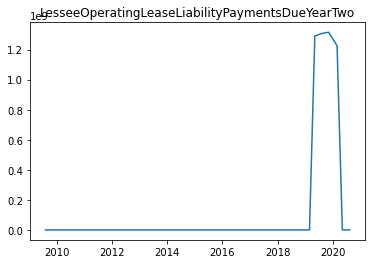

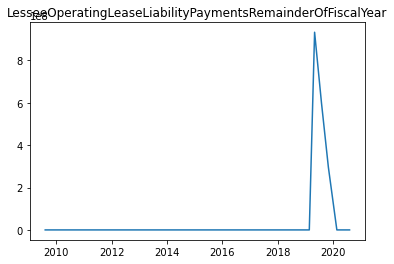

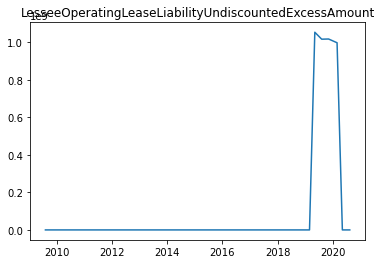

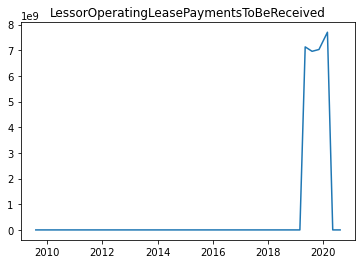

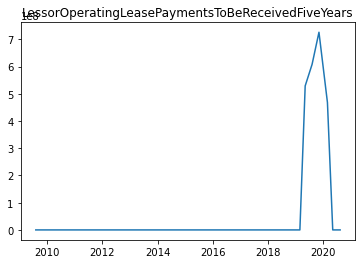

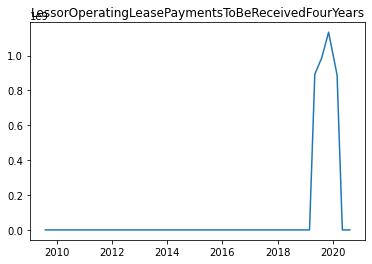

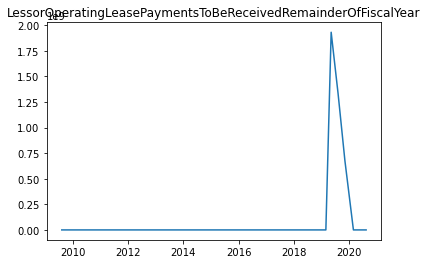

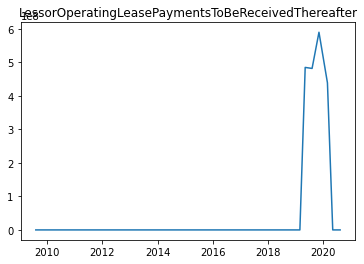

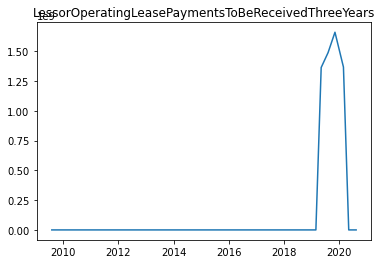

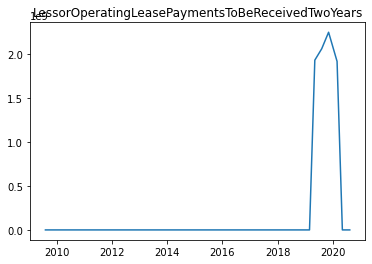

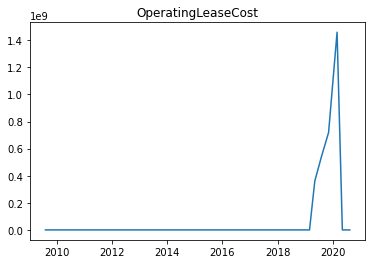

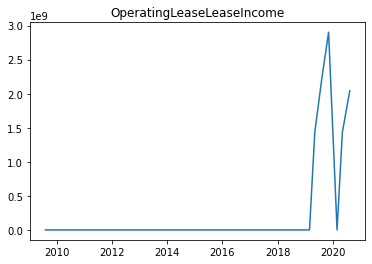

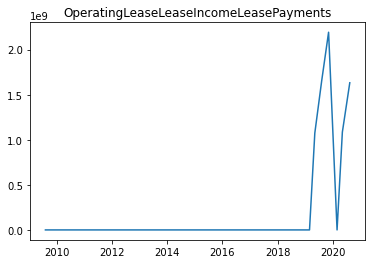

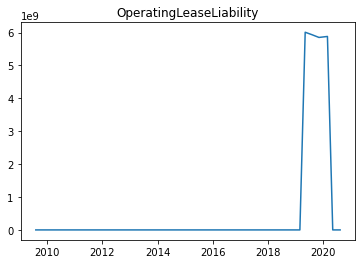

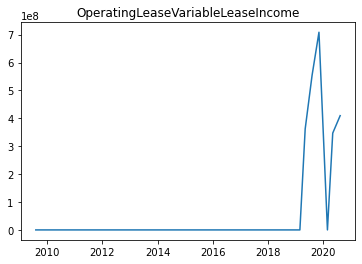

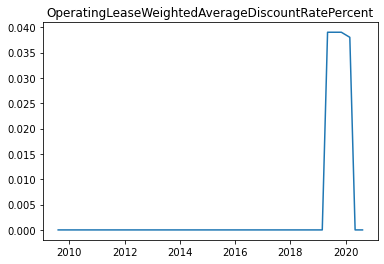

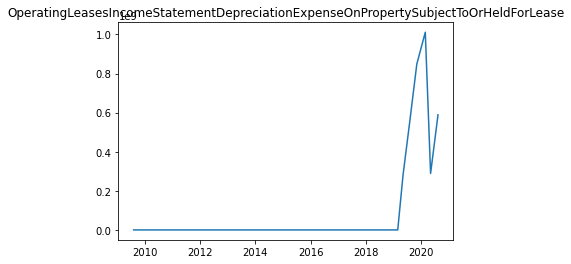

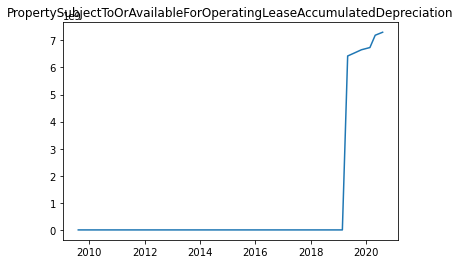

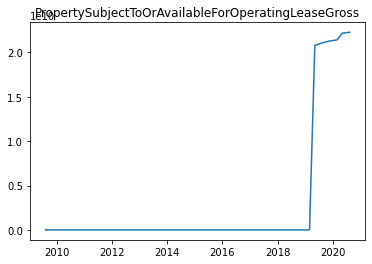

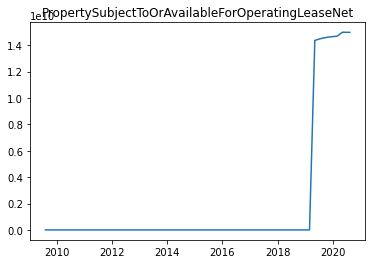

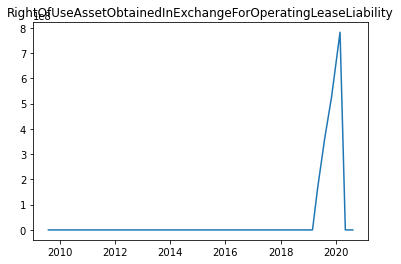

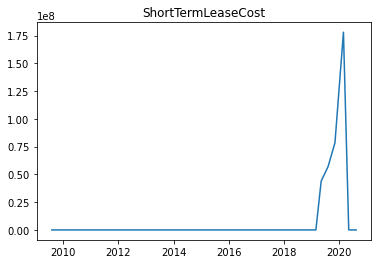

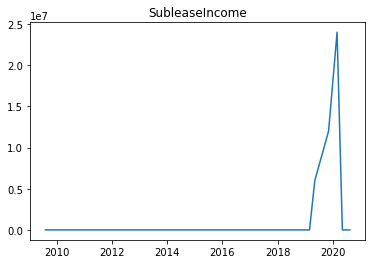

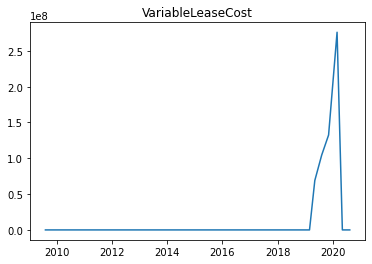

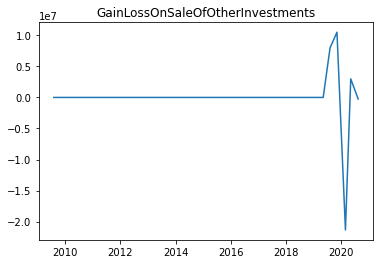

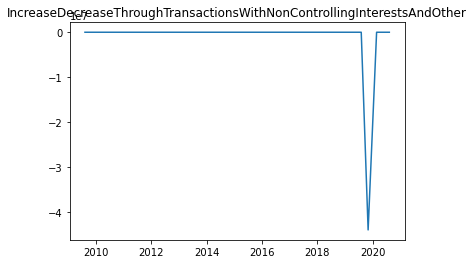

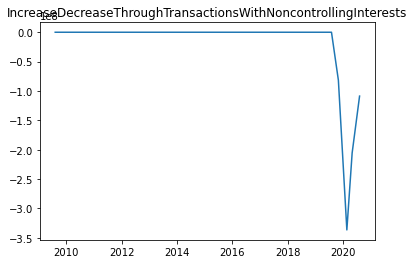

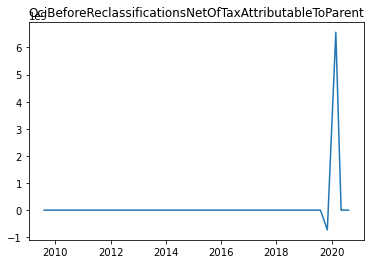

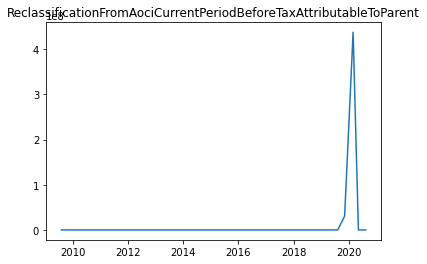

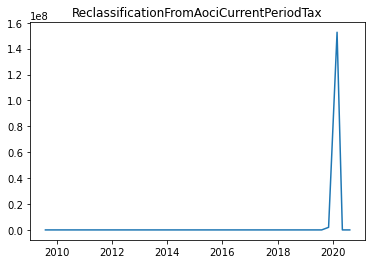

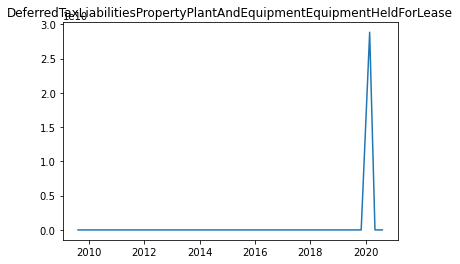

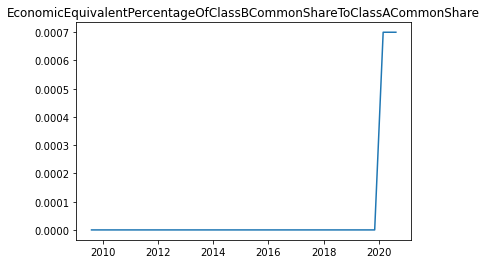

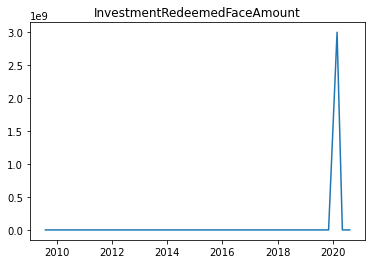

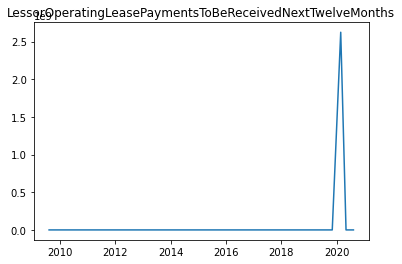

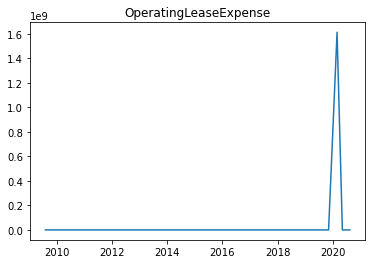

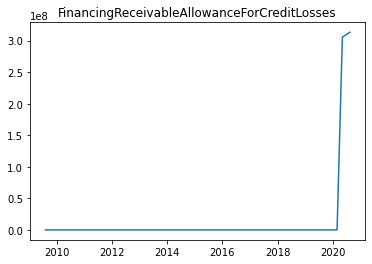

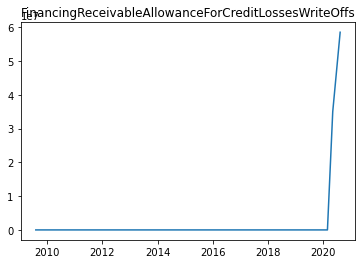

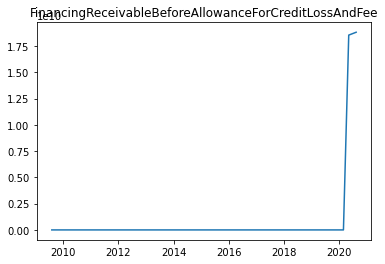

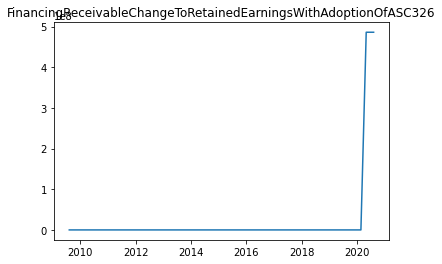

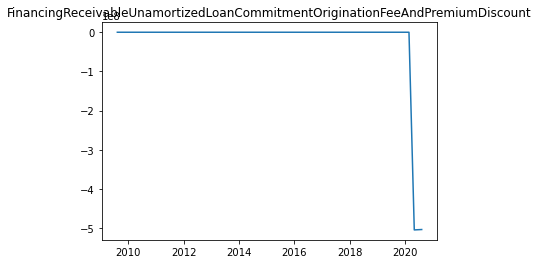

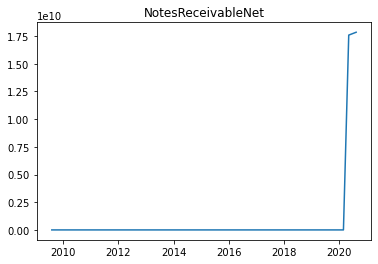

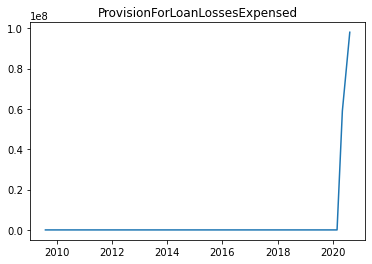

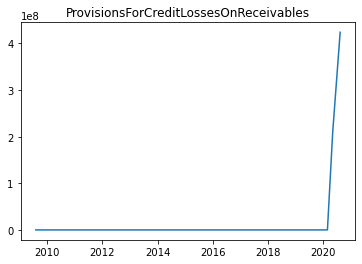

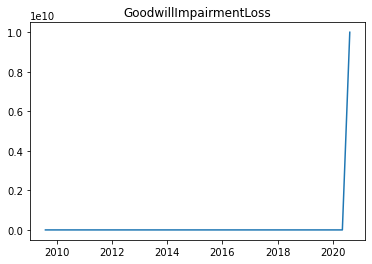

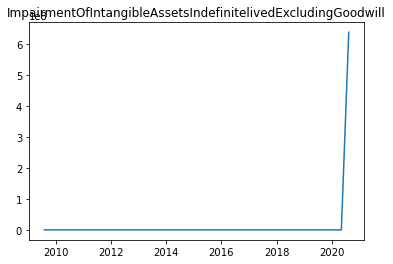

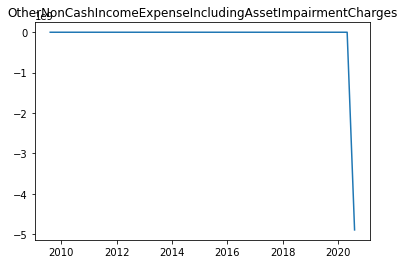

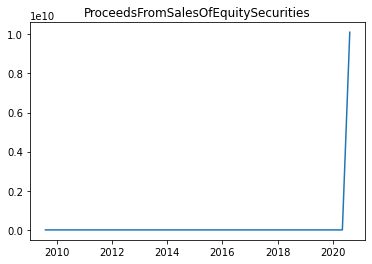

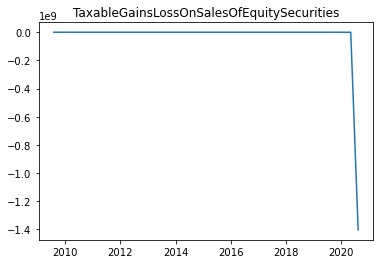

In [39]:
funds.fillna(0,inplace=True)
funds.sort_values("filed",ascending=True,inplace=True)
for column in funds.columns:
    if column not in ["adsh","_id","cik","filed"]:
        plt.plot(funds["filed"],funds[column])
        plt.title(column)
        plt.show()

In [33]:
a = pd.DataFrame(analysis)

AccumulatedOtherComprehensiveIncomeLossNetOfTax
Assets
IncomeTaxExpenseBenefit
IncomeTaxesPrincipallyDeferred
IncreaseDecreaseInIncomeTaxes
Liabilities
LiabilitiesAndStockholdersEquity
NetIncomeLoss
NetIncomeLossAttributableToNoncontrollingInterest
ProceedsFromRepaymentsOfShortTermDebt
AdditionalPaidInCapitalCommonStock
CommonStockValue
ComprehensiveIncomeNetOfTax
ComprehensiveIncomeNetOfTaxAttributableToNoncontrollingInterest
IncomeTaxesPaidNet
